<div class="usecase-title">Public Event Planning</div>

<div class="usecase-authors"><b>Authored by: </b> Samiha Haque</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Data Visualization, Data Wrangling, Machine Learning Models, Geographical Coordinate Handling</div>
    
</div>

<div class="usecase-section-header">Scenario</div>

- As an event planner, I want to know the locations of past public events so that I can run my own public events - sport/promotion/music/filming/photo shoot/memorial/public holiday with ease.

- As an event planner, I want to know about available parking areas near the events so that my guests can park their cars with ease.

- As an event planner, I want to know closest banner spots near my events so that I can promote my events successfully

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- Learn to work with categorical locations and geolocations using geopy
- Learn to plot multiple geolocations on a map using folium
- Learn to find nearest neighbours using KNeighborsRegressor and NearestNeighbors

<div class="usecase-section-header"><b>Business Friendy and Digitally Connected City</b></div>

The two of the eight priorities of the Economic Development Strategy 2031 of the city of Melbourne is to create a business friendly city and to develop a digitally connected city. Supporting businesses like event planning will help to drive the economy recovery and also help to map and connect public events, parkings and promotions through out the city of Melboune.

Datasets used:

- [Event permits 2014-2018 including film shoots, photo shoots, weddings, Christmas parties, promotions, fun runs and public events](https://data.melbourne.vic.gov.au/explore/dataset/event-permits-2014-2018-including-film-shoots-photo-shoots-weddings-christmas-pa/information/)<br>
This dataset mainly contains the category, start date, end date and categorical location of different events that get permits throughout the city of Melbourne. This dataset is used to identify the locations where each category of events take place.</p>
- [On-street Parking Bay Sensors](https://data.melbourne.vic.gov.au/explore/dataset/on-street-parking-bay-sensors/information/)<br>
This dataset mainly contains the zone number, status and geolocation  of parking spots throughout the city of Melbourne. This dataset is used to find the nearest parking spots around any given event.</p>
- [Bookable Banner Poles](https://data.melbourne.vic.gov.au/explore/dataset/bookable-banner-poles/information/)<br>
This dataset mainly contains the type, geolocation and booking group of five types of banners throughout the city of Melbourne which are 2.0, 4.0, 5.0, 6.0, 7.0 and 8.0. This dataset is used to find the nearest location of banners given any event location for promotional activities.</p>

In [ ]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [176]:
#importing dependencies
import requests
import pandas as pd
import numpy as np
from datetime import datetime
from decimal import Decimal
from io import StringIO
import geopy
from geopy.geocoders import Nominatim
import folium
from ipywidgets import interact, widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from category_encoders.binary import BinaryEncoder

from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from keras.callbacks import EarlyStopping
from sklearn.neighbors import NearestNeighbors

In [3]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='bookable-banner-poles'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    banner_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(banner_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

   asset_number                                  asset_description  \
0       1110157                    Banner Pole - Super Banner Pole   
1       1109877                    Banner Pole - Super Banner Pole   
2       1110079                    Banner Pole - Super Banner Pole   
3       1110078                    Banner Pole - Super Banner Pole   
4       1110112                    Banner Pole - Super Banner Pole   
5       1110107                    Banner Pole - Super Banner Pole   
6       1110270  Standard Banner Pole - Elizabeth St: Bourke St...   
7       1109846                    Banner Pole - Super Banner Pole   
8       1109901                    Banner Pole - Super Banner Pole   
9       1110375  Standard Banner Pole - Lansdowne St: Wellingto...   

   banner_pole_type  book_group             model_descr_lupvalue  \
0               2.0        17.0  Banner Pole - Super Banner Pole   
1               2.0        92.0  Banner Pole - Super Banner Pole   
2               2.0      

In [4]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='on-street-parking-bay-sensors'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    parking_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(parking_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

                 lastupdated           status_timestamp  zone_number  \
0  2023-10-25T01:44:02+00:00  2023-10-25T01:07:05+00:00       7556.0   
1  2023-10-25T01:44:02+00:00  2023-10-25T00:57:43+00:00       7556.0   
2  2023-10-25T01:44:02+00:00  2023-10-25T01:12:46+00:00       7556.0   
3  2023-10-25T01:44:02+00:00  2023-10-24T19:31:04+00:00       7556.0   
4  2023-10-25T01:44:02+00:00  2023-10-24T23:56:41+00:00       7556.0   
5  2023-10-25T01:44:02+00:00  2023-10-25T01:33:40+00:00       7556.0   
6  2023-10-25T01:44:02+00:00  2023-10-25T01:12:19+00:00       7566.0   
7  2023-10-25T01:44:02+00:00  2023-10-24T23:13:59+00:00       7566.0   
8  2023-10-25T01:44:02+00:00  2023-10-24T21:58:19+00:00       7566.0   
9  2023-10-25T01:44:02+00:00  2023-10-25T00:50:21+00:00       7566.0   

  status_description  kerbsideid                                 location  
0            Present        5730    -37.81058233418289, 144.9680525765466  
1            Present        5728   -37.810565621747756,

In [5]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='event-permits-2014-2018-including-film-shoots-photo-shoots-weddings-christmas-pa'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    events_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(events_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

                   title event_start   event_end       category_1  \
0                Anthony  2015-02-17  2015-02-17  Filming - Movie   
1     Spirit Of The Game  2015-08-18  2015-08-18  Filming - Movie   
2          Ali's Wedding  2015-11-30  2015-11-30  Filming - Movie   
3               Dogfight  2016-08-23  2016-08-23  Filming - Movie   
4     Dogfight Unit Base  2016-09-21  2016-09-21  Filming - Movie   
5               Dogfight  2016-09-11  2016-09-11  Filming - Movie   
6  Freedom - Music Video  2014-06-25  2014-06-26  Filming - Other   
7  Guerilla Gig Sheppard  2014-06-26  2014-06-26  Filming - Other   
8       Winners & Losers  2014-08-12  2014-08-12  Filming - Other   
9  AFLPA MVP OB Compound  2014-09-09  2014-09-10  Filming - Other   

            category_2                location  
0                  NaN  Inner Suburb Locations  
1                  NaN         Carlton Gardens  
2                  NaN  Inner Suburb Locations  
3                  NaN  Inner Suburb Locatio

<b>EVENTS</b>

In [6]:
events_df.head()

,title,event_start,event_end,category_1,category_2,location
0,Anthony,2015-02-17,2015-02-17,Filming - Movie,NaN,Inner Suburb Locations
1,Spirit Of The Game,2015-08-18,2015-08-18,Filming - Movie,NaN,Carlton Gardens
2,Ali's Wedding,2015-11-30,2015-11-30,Filming - Movie,NaN,Inner Suburb Locations
3,Dogfight,2016-08-23,2016-08-23,Filming - Movie,NaN,Inner Suburb Locations
4,Dogfight Unit Base,2016-09-21,2016-09-21,Filming - Movie,NaN,Flagstaff Gardens


In [7]:
events_df.shape

(2827, 6)

In [8]:
events_df.nunique()

title          1877
event_start    1155
event_end      1150
category_1       34
category_2       11
location        619
dtype: int64

In [9]:
events_df[['category_1']].value_counts()

category_1                             
Wedding                                    615
Public Event - Non-ticketed                446
Promotion                                  430
Filming - TV Series                        200
Public Event - Run Walk                    165
Filming - TVC                              158
Public Event - Ticketed                    111
Public Event - Low Impact Activity          92
Filming - Photo shoot                       90
Private Event                               87
Filming - Unit Base                         58
Filming - Student                           57
Public Event - Non Ticketed                 56
Public Event - Music Event                  41
Filming - Other                             40
Public Event - Media/Launch Event           36
Public Event - Run/Walk                     33
Public Event - Memorial                     25
Filming - Movie                             21
Public Event - Cycling Event                19
Public Event - Parad

<b>Handling null values</b>

In [10]:
events_df.isna().sum() #category_2 has highest null values

title             0
event_start       0
event_end         4
category_1        0
category_2     2751
location          5
dtype: int64

In [11]:
events_df[events_df['category_2'].notnull()][['category_1','category_2']].value_counts()
#Not much difference found between category_1 and category_2 values

category_1                          category_2           
Private Event                       Christmas Party          46
Filming - TV Series                 Filming - Unit            7
Public Event - Non-ticketed         Public                    7
Filming - Movie                     Filming - Unit Base       4
Filming - Photo shoot               Filming - Other           2
Filming - TVC                       Filming - Photo shoot     2
Filming - Movie                     Filming - Student         1
Filming - Photo shoot               Public Event              1
Filming - TVC                       Filming - Other           1
                                    Filming - TV Series       1
                                    Filming - Unit Base       1
Private Event -                     Christmas Party           1
Public Event - Low Impact Activity  Filming                   1
Public Event - Non-ticketed         Recrea                    1
Name: count, dtype: int64

In [12]:
events_df.drop(['title','category_2'],axis=1,inplace=True) #dropped category_2
events_df.head()

,event_start,event_end,category_1,location
0,2015-02-17,2015-02-17,Filming - Movie,Inner Suburb Locations
1,2015-08-18,2015-08-18,Filming - Movie,Carlton Gardens
2,2015-11-30,2015-11-30,Filming - Movie,Inner Suburb Locations
3,2016-08-23,2016-08-23,Filming - Movie,Inner Suburb Locations
4,2016-09-21,2016-09-21,Filming - Movie,Flagstaff Gardens


In [13]:
events_df.isna().sum()

event_start    0
event_end      4
category_1     0
location       5
dtype: int64

In [14]:
events_df[events_df['event_end'].isna()]

,event_start,event_end,category_1,location
1782,2014-12-08,NaN,Filming - Other,Russell Street
1878,2016-02-25,NaN,Filming - TV Series Filming - TV Series,"Alexandra Gardens, Kings Domain, All Other Spa..."
2190,2015-04-26,NaN,Public Event - Non-ticketed,City Square
2795,2017-04-02,NaN,Public Event - Ticketed,Kings Domain


In [15]:
events_df.dropna(axis=0,inplace=True) #drop rows which have null values

In [16]:
events_df.isna().sum()

event_start    0
event_end      0
category_1     0
location       0
dtype: int64

In [17]:
events_df.shape

(2818, 4)

<b>Creating single location names for corresponding categories in each record</b>

In [18]:
category=events_df['category_1'].unique()
category_dict={}
for i in category:
    val=events_df.loc[events_df['category_1']==i,['location','event_start','event_end']]
    category_dict[i]=val

In [19]:
event_cat=[]
event_loc=[]
start_date=[]
end_date=[]
for i,j in category_dict.items():
    row=0
    for x in j['location']:
        if ", " in x:
            loc_lst=x.split(", ")
            for y in loc_lst:
                event_cat.append(i)
                start_date.append(j.iloc[row,1])
                end_date.append(j.iloc[row,2])
                event_loc.append(f"{y}, Melbourne, Australia")
        elif " - " in x:
            loc_lst=x.split(" - ")
            for y in loc_lst:
                event_cat.append(i)
                start_date.append(j.iloc[row,1])
                end_date.append(j.iloc[row,2])
                event_loc.append(f"{y}, Melbourne, Australia")
        else:
            event_cat.append(i)
            start_date.append(j.iloc[row,1])
            end_date.append(j.iloc[row,2])
            event_loc.append(f"{x}, Melbourne, Australia")
        row+=1

In [20]:
events_loc_df=pd.DataFrame({'Events': event_cat, 'Location': event_loc,'Start_date':start_date,'End_date':end_date})
events_loc_df.head(10)

,Events,Location,Start_date,End_date
0,Filming - Movie,"Inner Suburb Locations, Melbourne, Australia",2015-02-17,2015-02-17
1,Filming - Movie,"Carlton Gardens, Melbourne, Australia",2015-08-18,2015-08-18
2,Filming - Movie,"Inner Suburb Locations, Melbourne, Australia",2015-11-30,2015-11-30
3,Filming - Movie,"Inner Suburb Locations, Melbourne, Australia",2016-08-23,2016-08-23
4,Filming - Movie,"Flagstaff Gardens, Melbourne, Australia",2016-09-21,2016-09-21
5,Filming - Movie,"Treasury Gardens, Melbourne, Australia",2016-09-11,2016-09-11
6,Filming - Movie,"Promotional Sites, Melbourne, Australia",2014-05-05,2014-05-10
7,Filming - Movie,"Princes Park, Melbourne, Australia",2014-12-04,2014-12-04
8,Filming - Movie,"Little Bourke Street, Melbourne, Australia",2014-12-09,2014-12-10
9,Filming - Movie,"Rankins Lane, Melbourne, Australia",2014-12-09,2014-12-10


In [21]:
events_loc_df.shape

(5132, 4)

<b>Converting location names to latitude,longitude coordinates using geolocator</b>

In [22]:
# @retrying.retry(wait_fixed=2000, stop_max_attempt_number=5)
def coordinates(location):
    loc = geolocator.geocode(location)
    if loc:
        return loc.latitude, loc.longitude
    else:
        raise Exception("Geocoding failed")


lat=[]
lon=[]
lookup_loc=[]
lookup_lat=[]
lookup_lon=[]

geolocator = Nominatim(user_agent="my_geocoder",timeout=5)


for i in events_loc_df['Location']:

    if i not in lookup_loc:

        try:
            l1,l2=coordinates(i)

            if l2:
                lat.append(l1)
                lon.append(l2)
                lookup_loc.append(i)
                lookup_lat.append(l1)
                lookup_lon.append(l2)

        except Exception as e:
            lat.append(i)
            lon.append(i)
            lookup_loc.append(i)
            lookup_lat.append(i)
            lookup_lon.append(i)
    else:
        ind=lookup_loc.index(i)

        lat.append(lookup_lat[ind])
        lon.append(lookup_lon[ind])



In [23]:
len(lat),len(lon),len(event_cat)

(5132, 5132, 5132)

<b>New Dataframe with Category, Start_date, End_date, Latitude, Longitude and Location</b>

In [24]:
events_lat_lon = pd.DataFrame({'Category': event_cat,'Start_date':start_date,'End_date':end_date, 'Latitude': lat,'Longitude':lon,'Location':event_loc})

In [25]:
events_lat_lon.head()

,Category,Start_date,End_date,Latitude,Longitude,Location
0,Filming - Movie,2015-02-17,2015-02-17,"Inner Suburb Locations, Melbourne, Australia","Inner Suburb Locations, Melbourne, Australia","Inner Suburb Locations, Melbourne, Australia"
1,Filming - Movie,2015-08-18,2015-08-18,-37.806248,144.971232,"Carlton Gardens, Melbourne, Australia"
2,Filming - Movie,2015-11-30,2015-11-30,"Inner Suburb Locations, Melbourne, Australia","Inner Suburb Locations, Melbourne, Australia","Inner Suburb Locations, Melbourne, Australia"
3,Filming - Movie,2016-08-23,2016-08-23,"Inner Suburb Locations, Melbourne, Australia","Inner Suburb Locations, Melbourne, Australia","Inner Suburb Locations, Melbourne, Australia"
4,Filming - Movie,2016-09-21,2016-09-21,-37.810879,144.954607,"Flagstaff Gardens, Melbourne, Australia"


In [ ]:
# events_lat_lon.duplicated().sum()

In [ ]:
# events_lat_lon.drop_duplicates(keep='first', inplace=True)
# events_lat_lon.duplicated().sum()

<b>Checking latitude,longitude values which could not be converted to coordinates</b>

In [26]:
events_lat_lon.loc[events_lat_lon['Latitude'].apply(lambda x: isinstance(x, str)),'Latitude'].value_counts()

Latitude
Inner Suburb Locations, Melbourne, Australia                               273
Other Park Locations, Melbourne, Australia                                 140
Promotional Sites, Melbourne, Australia                                    140
Southbank Spillway, Melbourne, Australia                                   123
Roads / Public Access Spaces, Melbourne, Australia                          88
All Other Spaces, Melbourne, Australia                                      83
Bourke St Mall - next to Tourism booth, Melbourne, Australia                75
next to Tourism booth, Melbourne, Australia                                 57
Southbank Spillway , Melbourne, Australia                                   53
AG - Riverslide Skate Park, Melbourne, Australia                            38
Argyle Square Stage Only, Melbourne, Australia                              21
Meyers Place (Green Laneway), Melbourne, Australia                          13
Other Laneways/Places/Alleys, Melbourne, Au

<b>Manually converting few selected longitude, latitude coordinates(Assumed all inner suburbs as Carlton)</b>

In [27]:
events_lat_lon.loc[events_lat_lon['Latitude']=='Bourke St Mall - next to Tourism booth, Melbourne, Australia','Latitude']=-37.811425719556375
events_lat_lon.loc[events_lat_lon['Longitude']=='Bourke St Mall - next to Tourism booth, Melbourne, Australia','Longitude']=144.9642798285428

events_lat_lon.loc[events_lat_lon['Latitude']=='AG - Riverslide Skate Park, Melbourne, Australia','Latitude']=-37.81740602754738
events_lat_lon.loc[events_lat_lon['Longitude']=='AG - Riverslide Skate Park, Melbourne, Australia','Longitude']=144.9729885581025

events_lat_lon.loc[events_lat_lon['Latitude']=='Argyle Square Stage Only, Melbourne, Australia','Latitude']=-37.79994933523437
events_lat_lon.loc[events_lat_lon['Longitude']=='Argyle Square Stage Only, Melbourne, Australia','Longitude']=144.9668979307423

events_lat_lon.loc[events_lat_lon['Latitude']=='Meyers Place (Green Laneway), Melbourne, Australia','Latitude']=-37.809521131914906
events_lat_lon.loc[events_lat_lon['Longitude']=='Meyers Place (Green Laneway), Melbourne, Australia','Longitude']=144.97168456715806

events_lat_lon.loc[events_lat_lon['Latitude']=='BM Birrarung Marr, Melbourne, Australia','Latitude']=-37.819058
events_lat_lon.loc[events_lat_lon['Longitude']=='BM Birrarung Marr, Melbourne, Australia','Longitude']=144.974327

events_lat_lon.loc[events_lat_lon['Latitude']=='NMCC Soccer, Melbourne, Australia','Latitude']=-37.79280741138573
events_lat_lon.loc[events_lat_lon['Longitude']=='NMCC Soccer, Melbourne, Australia','Longitude']=144.93997444199712

events_lat_lon.loc[events_lat_lon['Latitude']=='Southern Cross Pedestrian Bridge, Melbourne, Australia','Latitude']=-37.815430188169096
events_lat_lon.loc[events_lat_lon['Longitude']=='Southern Cross Pedestrian Bridge, Melbourne, Australia','Longitude']=144.95278728089147

events_lat_lon.loc[events_lat_lon['Latitude']=='Chinatown Plaza, Melbourne, Australia','Latitude']=-37.81055582784353
events_lat_lon.loc[events_lat_lon['Longitude']=='Chinatown Plaza, Melbourne, Australia','Longitude']=144.96919346931784

events_lat_lon.loc[events_lat_lon['Latitude']=='Chinatown Plaza - see notes., Melbourne, Australia','Latitude']=-37.81055582784353
events_lat_lon.loc[events_lat_lon['Longitude']=='Chinatown Plaza - see notes., Melbourne, Australia','Longitude']=144.96919346931784

events_lat_lon.loc[events_lat_lon['Latitude']=='Northbank Promenade, Melbourne, Australia','Latitude']=-37.81883297899373
events_lat_lon.loc[events_lat_lon['Longitude']=='Northbank Promenade, Melbourne, Australia','Longitude']=144.93761358465892

events_lat_lon.loc[events_lat_lon['Latitude']=='Katherine Place (Green Laneway), Melbourne, Australia','Latitude']=-37.81333297388235
events_lat_lon.loc[events_lat_lon['Longitude']=='Katherine Place (Green Laneway), Melbourne, Australia','Longitude']=144.95689812465994

events_lat_lon.loc[events_lat_lon['Latitude']=='Bourke Street Mall - outfront of Adidas , Melbourne, Australia','Latitude']=-37.810705051858356
events_lat_lon.loc[events_lat_lon['Longitude']=='Bourke Street Mall - outfront of Adidas , Melbourne, Australia','Longitude']=144.96585977852442

events_lat_lon.loc[events_lat_lon['Latitude']=='Guildford Lane (Green Laneway(, Melbourne, Australia','Latitude']=-37.80945842151978
events_lat_lon.loc[events_lat_lon['Longitude']=='Guildford Lane (Green Laneway(, Melbourne, Australia','Longitude']=144.95981316261063

events_lat_lon.loc[events_lat_lon['Latitude']=='Straughton Lane, Melbourne, Australia','Latitude']=-37.81535364281512
events_lat_lon.loc[events_lat_lon['Longitude']=='Straughton Lane, Melbourne, Australia','Longitude']=144.96409712401254

events_lat_lon.loc[events_lat_lon['Latitude']=='Drewery Alley Drewery Lane, Melbourne, Australia','Latitude']=-37.808345973082375
events_lat_lon.loc[events_lat_lon['Longitude']=='Drewery Alley Drewery Lane, Melbourne, Australia','Longitude']=144.96437611033417

events_lat_lon.loc[events_lat_lon['Latitude']=='Drewery Alley - sensitive area many residents, Melbourne, Australia','Latitude']=-37.808345973082375
events_lat_lon.loc[events_lat_lon['Longitude']=='Drewery Alley - sensitive area many residents, Melbourne, Australia','Longitude']=144.96437611033417

events_lat_lon.loc[events_lat_lon['Latitude']=='Inner Suburb Locations, Melbourne, Australia','Latitude']=-37.798004076503936
events_lat_lon.loc[events_lat_lon['Longitude']=='Inner Suburb Locations, Melbourne, Australia','Longitude']=144.96662295572335

In [28]:
events_lat_lon.loc[events_lat_lon['Latitude'].apply(lambda x: isinstance(x, str)),'Latitude'].value_counts()

Latitude
Promotional Sites, Melbourne, Australia                                    140
Other Park Locations, Melbourne, Australia                                 140
Southbank Spillway, Melbourne, Australia                                   123
Roads / Public Access Spaces, Melbourne, Australia                          88
All Other Spaces, Melbourne, Australia                                      83
next to Tourism booth, Melbourne, Australia                                 57
Southbank Spillway , Melbourne, Australia                                   53
Other Laneways/Places/Alleys, Melbourne, Australia                          12
Street Locations, Melbourne, Australia                                       8
Shrine Reserve, Melbourne, Australia                                         8
HP - Cricket Nets, Melbourne, Australia                                      6
HP - Running Track, Melbourne, Australia                                     5
FP - Cordner_T1_T2_T3_F2_Ct3, Melbourne, Au

<b>New Dataframe without any unresolved coordinates</b>

In [29]:
events_lat_lon=events_lat_lon[events_lat_lon['Latitude'].apply(lambda x: not isinstance(x, str))]
events_lat_lon.head()

,Category,Start_date,End_date,Latitude,Longitude,Location
0,Filming - Movie,2015-02-17,2015-02-17,-37.798004,144.966623,"Inner Suburb Locations, Melbourne, Australia"
1,Filming - Movie,2015-08-18,2015-08-18,-37.806248,144.971232,"Carlton Gardens, Melbourne, Australia"
2,Filming - Movie,2015-11-30,2015-11-30,-37.798004,144.966623,"Inner Suburb Locations, Melbourne, Australia"
3,Filming - Movie,2016-08-23,2016-08-23,-37.798004,144.966623,"Inner Suburb Locations, Melbourne, Australia"
4,Filming - Movie,2016-09-21,2016-09-21,-37.810879,144.954607,"Flagstaff Gardens, Melbourne, Australia"


In [30]:
events_lat_lon.shape

(4363, 6)

<b>Displaying the event locations on map using Folium</b>

In [31]:
e = folium.Map(location=[events_lat_lon['Latitude'].mean(), events_lat_lon['Longitude'].mean()], zoom_start=10)

# Add markers for each location
for index, row in events_lat_lon.iterrows():

    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Location'],icon=folium.Icon("blue"),icon_size=(3, 3)).add_to(e)


legend_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 150px; height:50px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white; opacity: 0.8;">
       <p style="text-align:center; margin: 0;"><strong>Legend</strong></p>
       <p style="margin: 0;">Event Location: <span style="color:lightblue">&#9679;</span></p>
</div>
"""

# Add legend HTML to the map
e.get_root().html.add_child(folium.Element(legend_html))

title_html = """
<h3 style="text-align: center; margin: 10px 0;">Event and Parking Locations</h3>
"""
e.get_root().html.add_child(folium.Element(title_html))



display(e)

Output hidden; open in https://colab.research.google.com to view.

<b>Manually correcting some Category names</b>

In [32]:
events_lat_lon['Category'].value_counts()

Category
Public Event - Non-ticketed            815
Wedding                                612
Promotion                              552
Public Event - Run Walk                427
Filming - TVC                          334
Filming - TV Series                    271
Public Event - Ticketed                219
Filming - Photo shoot                  138
Public Event - Low Impact Activity     117
Public Event - Run/Walk                111
Public Event - Parade                  109
Public Event - Non Ticketed            101
Public Event - Memorial                 87
Private Event                           80
Public Event - Cycling Event            68
Filming - Student                       66
Public Event - Media/Launch Event       47
Filming - Other                         44
Public Event - Music Event              43
Filming - Unit Base                     39
Filming - Movie                         27
Pubilc Event - Non-ticketed             24
Public Event - Music                     9
Pu

In [33]:
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Non-ticketed','Category']='Public Event - Non Ticketed'
events_lat_lon.loc[events_lat_lon['Category']=='Pubilc Event - Non-ticketed','Category']='Public Event - Non Ticketed'
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Music Event','Category']='Public Event - Music'
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Media/Launch Event','Category']='Public Event - Media Launch'
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Run Walk','Category']='Public Event - Run/Walk'
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Cycling Event','Category']='Public Event - Cycling'
events_lat_lon.loc[events_lat_lon['Category']=='Filming - TV Series Filming - TV Series','Category']='Filming - TV Series'
events_lat_lon.loc[events_lat_lon['Category']=='Filming - TV Series, Filming - Unit','Category']='Filming - TV Series'
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Low Impact Activity,','Category']='Public Event - Low Impact Activity'
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Media Launch Event','Category']='Public Event - Media Launch'



In [34]:
events_lat_lon=events_lat_lon[events_lat_lon['Category'] != 'Private Event']

In [35]:
#Christmas party was private
events_lat_lon=events_lat_lon[events_lat_lon['Category'] != 'Private Event -']

In [36]:
events_lat_lon['Category'].value_counts()

Category
Public Event - Non Ticketed            940
Wedding                                612
Promotion                              552
Public Event - Run/Walk                538
Filming - TVC                          334
Filming - TV Series                    273
Public Event - Ticketed                219
Filming - Photo shoot                  138
Public Event - Low Impact Activity     118
Public Event - Parade                  109
Public Event - Memorial                 87
Public Event - Cycling                  73
Filming - Student                       66
Public Event - Media Launch             54
Public Event - Music                    52
Filming - Other                         44
Filming - Unit Base                     39
Filming - Movie                         27
Public Event - Outside Broadcast         4
Public Event                             2
Filming - TVC, Recreation and Sport      1
Name: count, dtype: int64

<b>Handling Datetime variable(New feature Duration created)</b>

In [37]:

events_lat_lon['Start_date']=events_lat_lon['Start_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
events_lat_lon['End_date']=events_lat_lon['End_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [38]:
duration=events_lat_lon['End_date']-events_lat_lon['Start_date']
events_lat_lon['Duration']=duration.dt.days

In [39]:
events_lat_lon['Start_ordinal'] = events_lat_lon['Start_date'].apply(lambda x: x.toordinal())
events_lat_lon['End_ordinal'] = events_lat_lon['End_date'].apply(lambda x: x.toordinal())

In [40]:
events_lat_lon.head()

,Category,Start_date,End_date,Latitude,Longitude,Location,Duration,Start_ordinal,End_ordinal
0,Filming - Movie,2015-02-17,2015-02-17,-37.798004,144.966623,"Inner Suburb Locations, Melbourne, Australia",0,735646,735646
1,Filming - Movie,2015-08-18,2015-08-18,-37.806248,144.971232,"Carlton Gardens, Melbourne, Australia",0,735828,735828
2,Filming - Movie,2015-11-30,2015-11-30,-37.798004,144.966623,"Inner Suburb Locations, Melbourne, Australia",0,735932,735932
3,Filming - Movie,2016-08-23,2016-08-23,-37.798004,144.966623,"Inner Suburb Locations, Melbourne, Australia",0,736199,736199
4,Filming - Movie,2016-09-21,2016-09-21,-37.810879,144.954607,"Flagstaff Gardens, Melbourne, Australia",0,736228,736228


In [41]:
events_lat_lon.drop_duplicates(keep='first', inplace=True)
events_lat_lon.duplicated().sum()

0

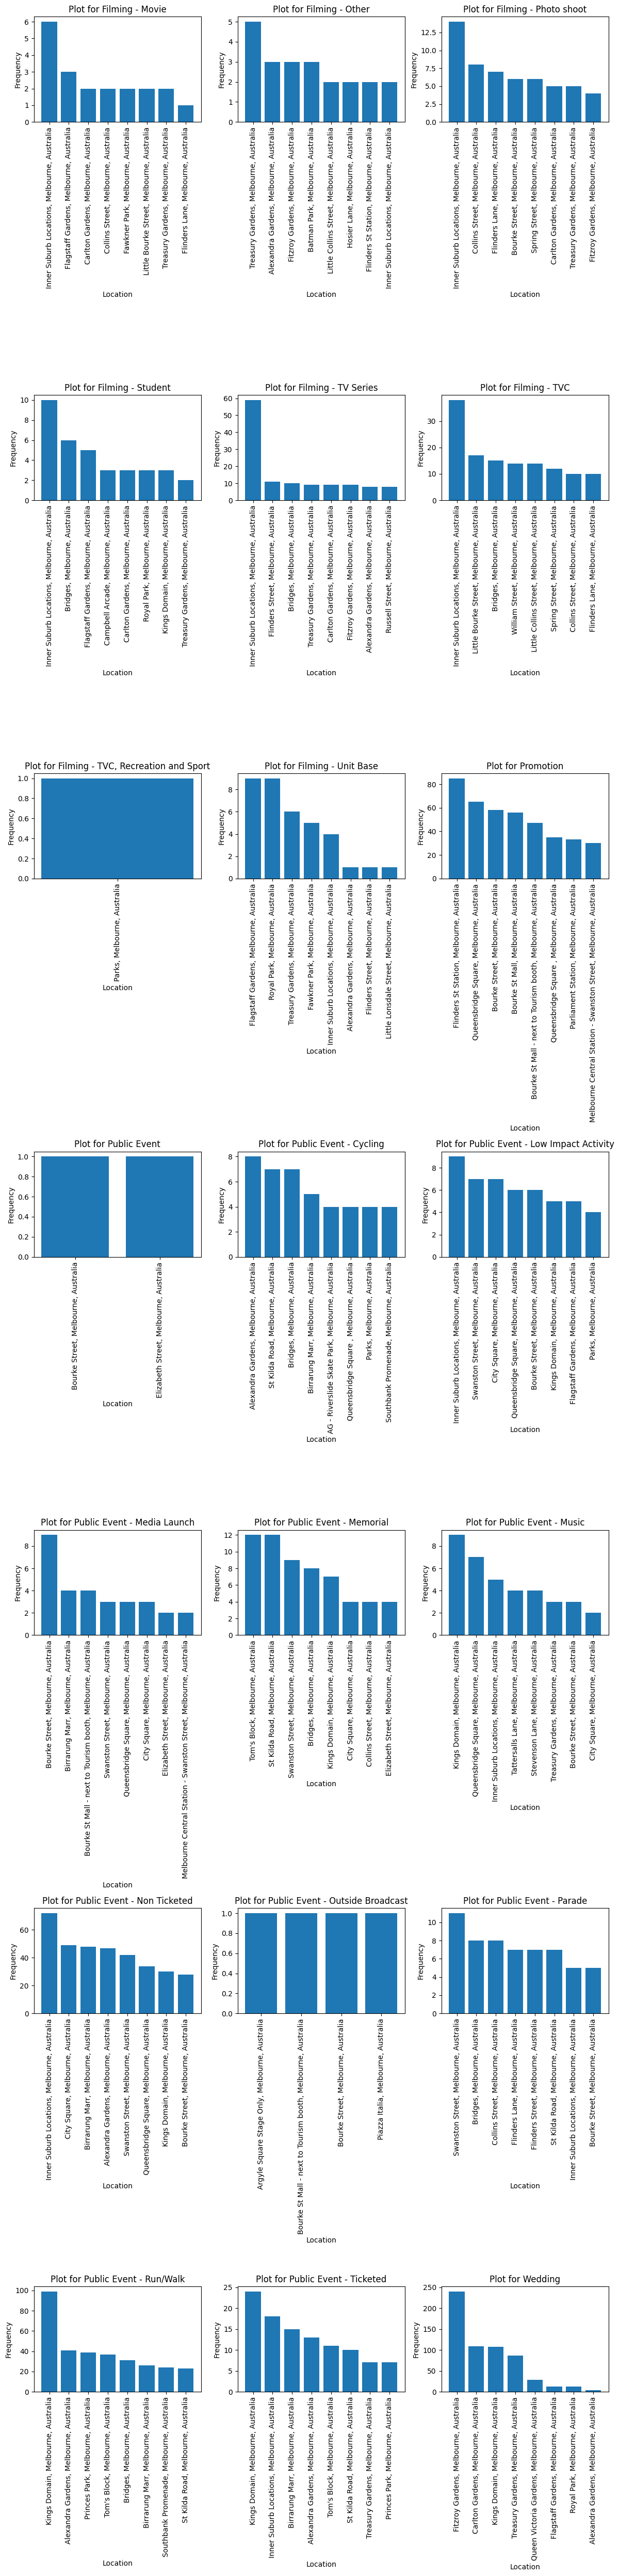

In [43]:
top_locations={}
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12, 50))

# Flatten the axes array to iterate over all subplots
axes = axes.flatten()

location_counts = events_lat_lon.groupby(['Category', 'Location']).size().reset_index(name='Frequency')

#top 8 locations for each event
Z=location_counts.groupby('Category')
num=0
for i in Z:
    cat=i[0]
    df=pd.DataFrame(i[1])
    df=df.sort_values(by='Frequency', ascending=False)
    top_x=df['Location'][:8].values
    top_y=df['Frequency'][:8].values

    top_locations[cat]=top_x

    ax = axes[num]

    ax.bar(top_x, top_y, label=cat)
    ax.set_title(f'Plot for {cat}')
    ax.set_xlabel('Location')
    ax.set_ylabel('Frequency')
    ax.set_xticks(top_x)
    ax.set_xticklabels(top_x,rotation=90)
    num+=1


plt.tight_layout()
plt.show()

In [124]:
events_copy=events_lat_lon.copy()
events_copy=events_copy[['Category','Start_ordinal','End_ordinal','Duration','Location','Latitude','Longitude']]

In [125]:
events_copy['Category'].nunique()

21

<b>Encoded Category values using Binary encoding</b>

In [126]:
cat=events_copy['Category']
binary_encoder = BinaryEncoder(cols=['Category'])

# Fit and transform the DataFrame
binary_encoder.fit(events_copy)
events_copy=binary_encoder.transform(events_copy)

events_copy['Category']=cat
events_copy

,Category_0,Category_1,Category_2,Category_3,Category_4,Start_ordinal,End_ordinal,Duration,Location,Latitude,Longitude,Category
0,0,0,0,0,1,735646,735646,0,"Inner Suburb Locations, Melbourne, Australia",-37.798004,144.966623,Filming - Movie
1,0,0,0,0,1,735828,735828,0,"Carlton Gardens, Melbourne, Australia",-37.806248,144.971232,Filming - Movie
2,0,0,0,0,1,735932,735932,0,"Inner Suburb Locations, Melbourne, Australia",-37.798004,144.966623,Filming - Movie
3,0,0,0,0,1,736199,736199,0,"Inner Suburb Locations, Melbourne, Australia",-37.798004,144.966623,Filming - Movie
4,0,0,0,0,1,736228,736228,0,"Flagstaff Gardens, Melbourne, Australia",-37.810879,144.954607,Filming - Movie
...,...,...,...,...,...,...,...,...,...,...,...,...
5124,0,1,0,0,1,736600,736612,12,"Queensbridge Square, Melbourne, Australia",-37.821212,144.961919,Public Event - Cycling
5126,1,0,1,0,0,736678,736679,1,"Parks, Melbourne, Australia",-37.884084,145.191641,"Filming - TVC, Recreation and Sport"
5127,1,0,1,0,1,735322,735329,7,"Bourke Street, Melbourne, Australia",-37.979117,145.055711,Public Event
5128,1,0,1,0,1,735322,735329,7,"Elizabeth Street, Melbourne, Australia",-37.809257,144.960791,Public Event


<b>Plotting histograms of each numeric feature to visualise the distribution and check for skewness</b>

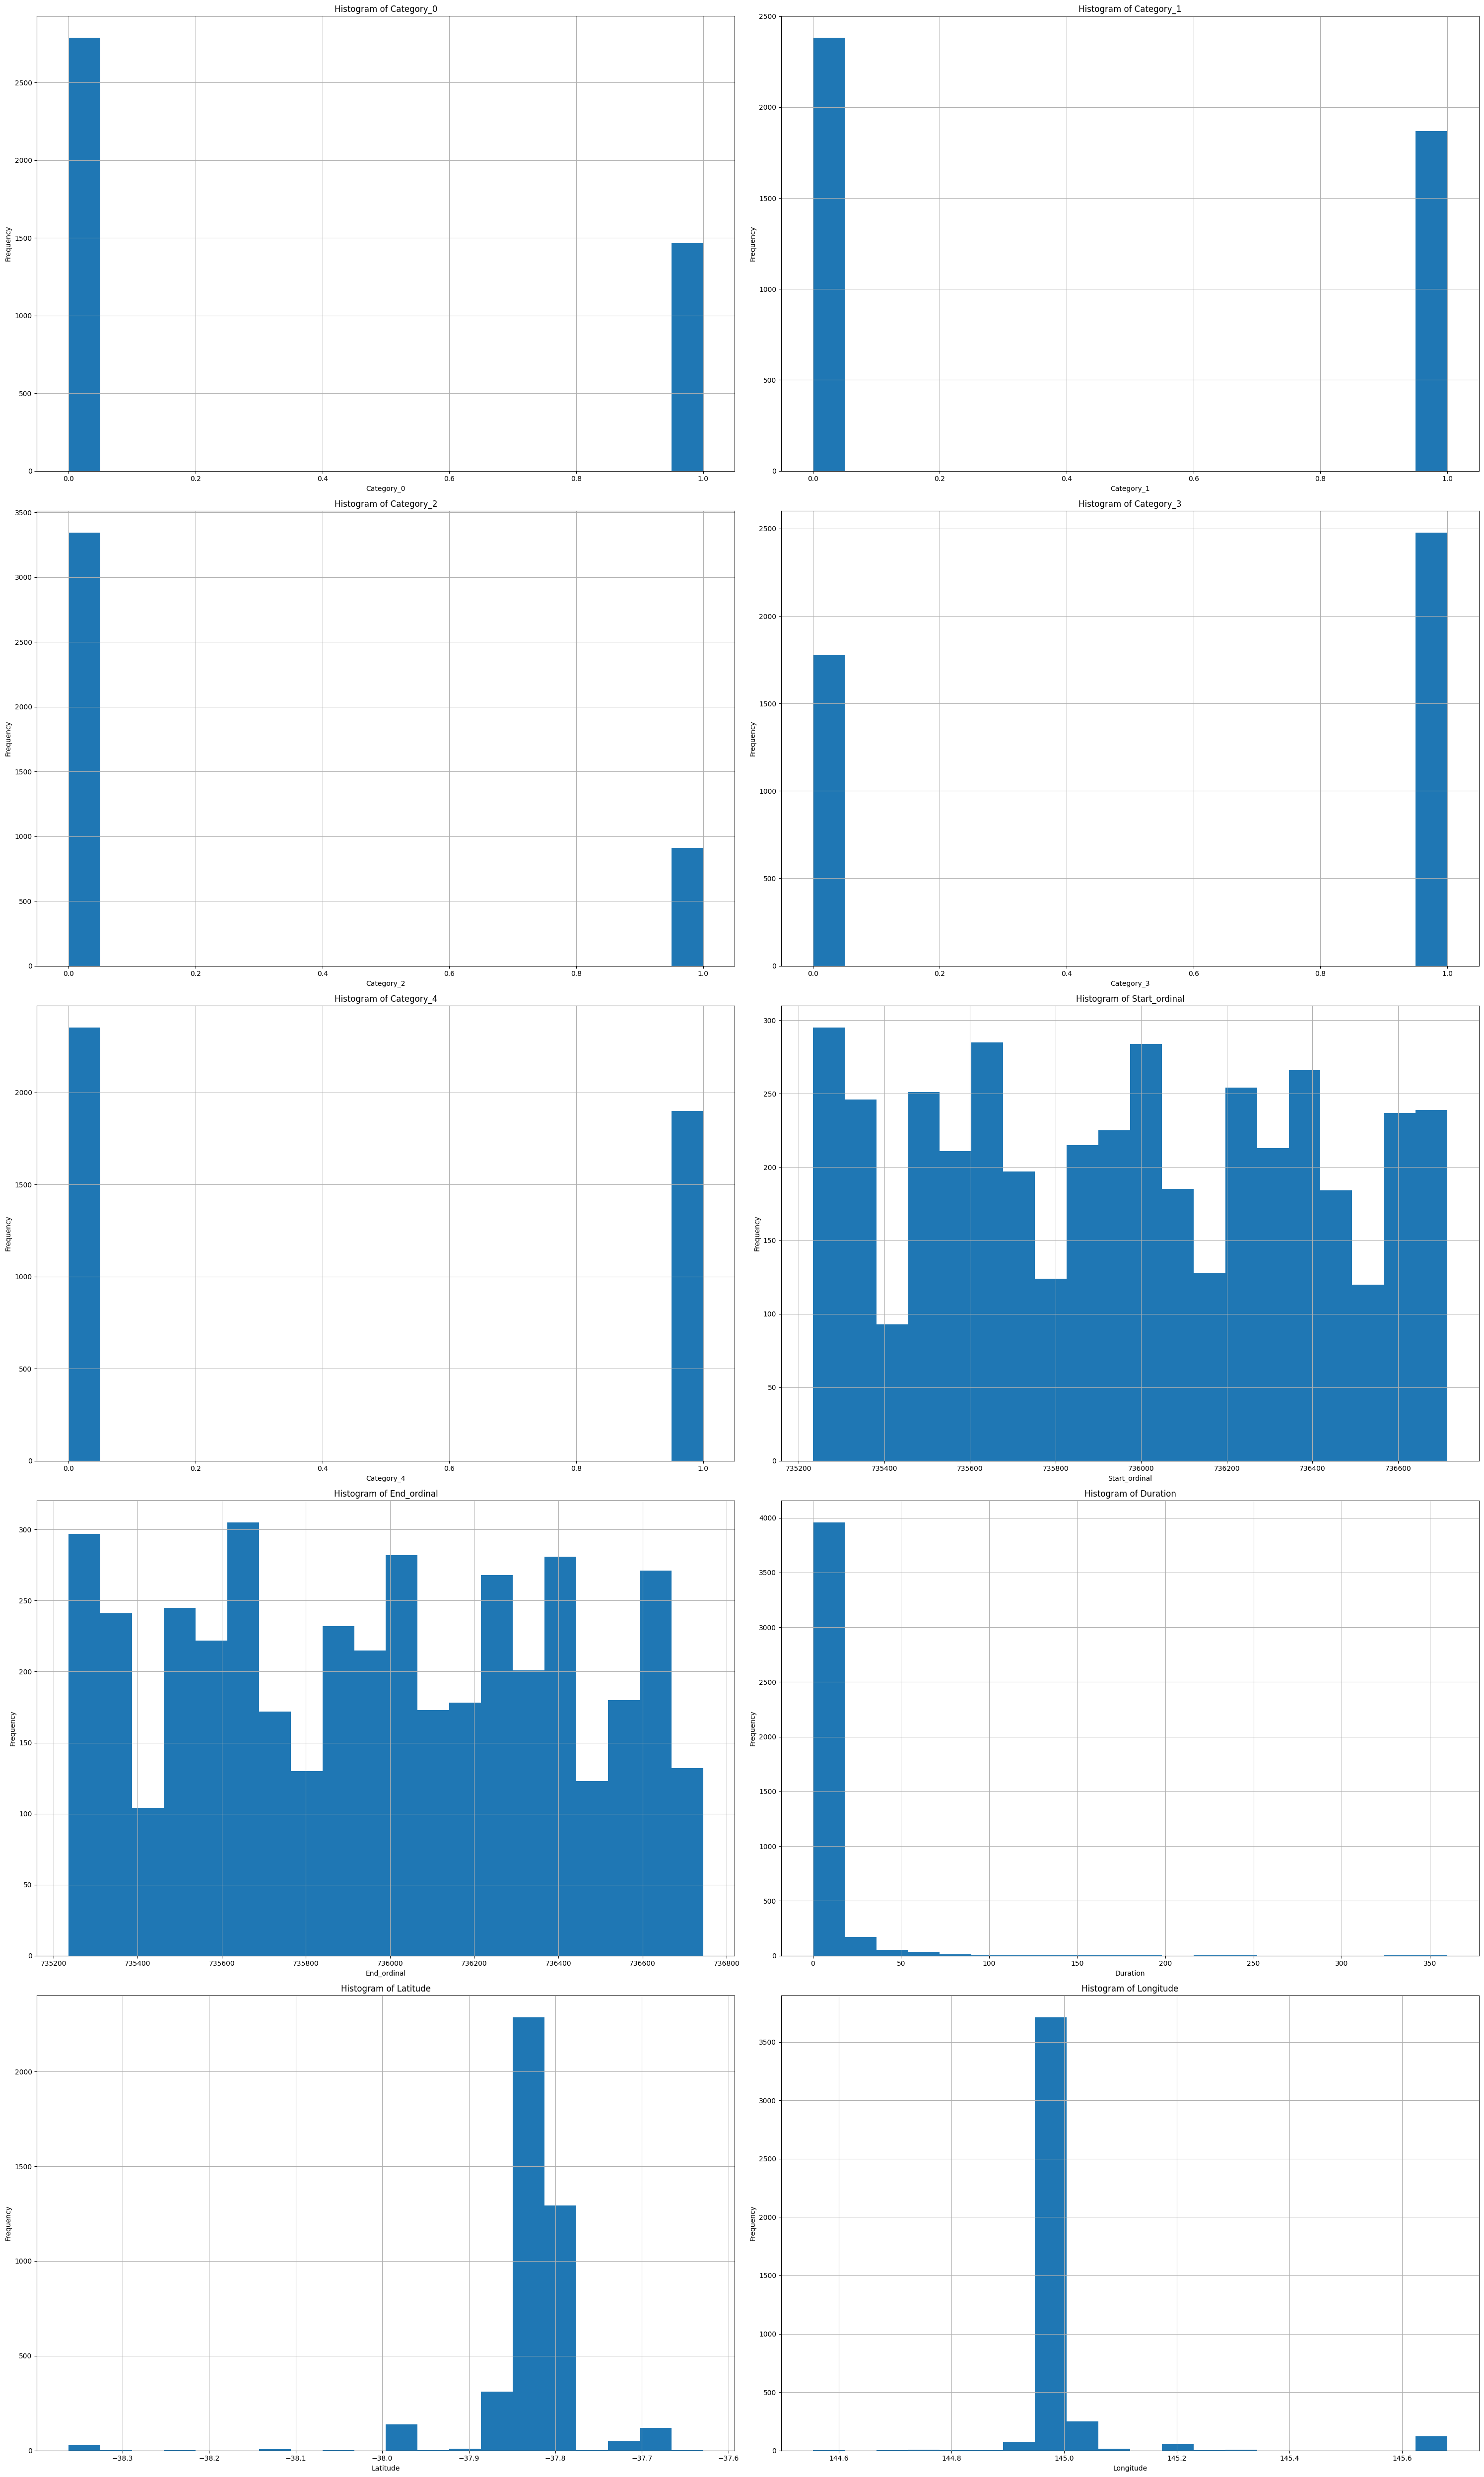

In [127]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude','Longitude']
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(30, 50))
num=0
for column in cols:

    ax=axes.flatten()[num] # Adjust figure size as needed
    ax.hist(events_copy[column], bins=20)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)
    num+=1

plt.tight_layout()
plt.show()

<b>Plotting the heatmap of all the numeric features to check for correlations</b>

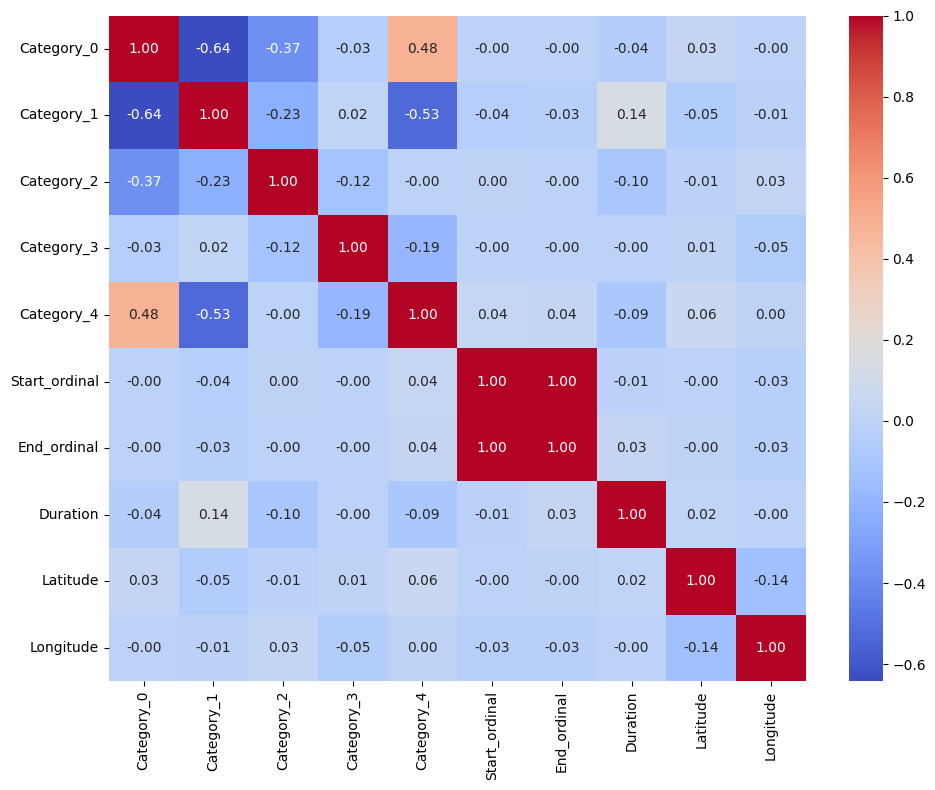

In [128]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude','Longitude']
events_corr = events_copy[cols].corr()
# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(events_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()


<b>Checking skewness of features</b>

In [129]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude','Longitude']
skewness=events_copy[cols].skew()
# Print the skewness of each feature
print("Skewness of Features:")
print(skewness)

Skewness of Features:
Category_0       0.655578
Category_1       0.242679
Category_2       1.396766
Category_3       -0.33491
Category_4       0.213893
Start_ordinal    0.014341
End_ordinal      0.012988
Duration         10.50623
Latitude        -4.958764
Longitude        4.749529
dtype: object


<b>It can be seen that Duration is heavily positively skewed. Category_0 and Category_4 also have some skewness but they are binary features so any modification is not required.</b>

<b>Yeo Johnson power transformation is applied since it works for both positive and negative data and is more robust</b>

In [130]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration']
pt = PowerTransformer(method='yeo-johnson')
yeojohnson_val_X = pt.fit_transform(events_copy[cols])

events_copy[cols]=yeojohnson_val_X

cols=['Latitude','Longitude']
pt = PowerTransformer(method='yeo-johnson')
yeojohnson_val_Y = pt.fit_transform(events_copy[cols])

events_copy[['Latitude Transformed','Longitude Transformed']]=yeojohnson_val_Y
events_copy

,Category_0,Category_1,Category_2,Category_3,Category_4,Start_ordinal,End_ordinal,Duration,Location,Latitude,Longitude,Category,Latitude Transformed,Longitude Transformed
0,-0.724643,-0.886033,-0.521451,-1.181310,1.112607,-0.726473,-0.737401,-0.826528,"Inner Suburb Locations, Melbourne, Australia",-37.798004,144.966623,Filming - Movie,4.163336e-17,-1.859624e-15
1,-0.724643,-0.886033,-0.521451,-1.181310,1.112607,-0.306818,-0.318057,-0.826528,"Carlton Gardens, Melbourne, Australia",-37.806248,144.971232,Filming - Movie,2.775558e-17,-1.609823e-15
2,-0.724643,-0.886033,-0.521451,-1.181310,1.112607,-0.067196,-0.078550,-0.826528,"Inner Suburb Locations, Melbourne, Australia",-37.798004,144.966623,Filming - Movie,4.163336e-17,-1.859624e-15
3,-0.724643,-0.886033,-0.521451,-1.181310,1.112607,0.547707,0.536005,-0.826528,"Inner Suburb Locations, Melbourne, Australia",-37.798004,144.966623,Filming - Movie,4.163336e-17,-1.859624e-15
4,-0.724643,-0.886033,-0.521451,-1.181310,1.112607,0.614415,0.602725,-0.826528,"Flagstaff Gardens, Melbourne, Australia",-37.810879,144.954607,Filming - Movie,1.387779e-17,-2.609024e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124,-0.724643,1.128626,-0.521451,-1.181310,1.112607,1.470111,1.485591,1.596275,"Queensbridge Square, Melbourne, Australia",-37.821212,144.961919,Public Event - Cycling,0.000000e+00,-2.164935e-15
5126,1.379990,-0.886033,1.917725,-1.181310,-0.898790,1.649364,1.639529,0.406659,"Parks, Melbourne, Australia",-37.884084,145.191641,"Filming - TVC, Recreation and Sport",-1.110223e-16,1.182388e-14
5127,1.379990,-0.886033,1.917725,-1.181310,1.112607,-1.474012,-1.468362,1.444496,"Bourke Street, Melbourne, Australia",-37.979117,145.055711,Public Event,-2.914335e-16,3.552714e-15
5128,1.379990,-0.886033,1.917725,-1.181310,1.112607,-1.474012,-1.468362,1.444496,"Elizabeth Street, Melbourne, Australia",-37.809257,144.960791,Public Event,1.387779e-17,-2.248202e-15


In [131]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude Transformed','Longitude Transformed']
skewness = events_copy[cols].skew()

# Print the skewness of each variable
print("Skewness of Variables:")
print(skewness)

Skewness of Variables:
Category_0               0.655578
Category_1               0.242679
Category_2               1.396766
Category_3              -0.334910
Category_4               0.213893
Start_ordinal            0.012573
End_ordinal              0.011344
Duration                 0.580368
Latitude Transformed     0.000000
Longitude Transformed    0.000000
dtype: float64


<b>Standardising Start_ordinal, End_ordinal and Duration the data using StandardScaler. Category_0 to Category_4 has binary values only and therefore standardising is not meaningful</b>

In [132]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude Transformed','Longitude Transformed']


scaler = StandardScaler()
scaled = scaler.fit_transform(events_copy[cols])

events_copy[cols]=scaled
events_copy

,Category_0,Category_1,Category_2,Category_3,Category_4,Start_ordinal,End_ordinal,Duration,Location,Latitude,Longitude,Category,Latitude Transformed,Longitude Transformed
0,-0.724643,-0.886033,-0.521451,-1.181310,1.112607,-0.726511,-0.737392,-0.826528,"Inner Suburb Locations, Melbourne, Australia",-37.798004,144.966623,Filming - Movie,0.393320,-0.247270
1,-0.724643,-0.886033,-0.521451,-1.181310,1.112607,-0.306855,-0.318048,-0.826528,"Carlton Gardens, Melbourne, Australia",-37.806248,144.971232,Filming - Movie,0.267377,-0.213932
2,-0.724643,-0.886033,-0.521451,-1.181310,1.112607,-0.067233,-0.078540,-0.826528,"Inner Suburb Locations, Melbourne, Australia",-37.798004,144.966623,Filming - Movie,0.393320,-0.247270
3,-0.724643,-0.886033,-0.521451,-1.181310,1.112607,0.547670,0.536014,-0.826528,"Inner Suburb Locations, Melbourne, Australia",-37.798004,144.966623,Filming - Movie,0.393320,-0.247270
4,-0.724643,-0.886033,-0.521451,-1.181310,1.112607,0.614378,0.602734,-0.826528,"Flagstaff Gardens, Melbourne, Australia",-37.810879,144.954607,Filming - Movie,0.141434,-0.347285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124,-0.724643,1.128626,-0.521451,-1.181310,1.112607,1.470073,1.485601,1.596275,"Queensbridge Square, Melbourne, Australia",-37.821212,144.961919,Public Event - Cycling,0.015491,-0.288017
5126,1.379990,-0.886033,1.917725,-1.181310,-0.898790,1.649327,1.639539,0.406659,"Parks, Melbourne, Australia",-37.884084,145.191641,"Filming - TVC, Recreation and Sport",-0.992052,1.578922
5127,1.379990,-0.886033,1.917725,-1.181310,1.112607,-1.474049,-1.468352,1.444496,"Bourke Street, Melbourne, Australia",-37.979117,145.055711,Public Event,-2.629309,0.475057
5128,1.379990,-0.886033,1.917725,-1.181310,1.112607,-1.474049,-1.468352,1.444496,"Elizabeth Street, Melbourne, Australia",-37.809257,144.960791,Public Event,0.141434,-0.299130


<b>Using MinMaxScaler to scale the dataset</b>

In [133]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude Transformed','Longitude Transformed']

scaler = MinMaxScaler()
scaler.fit(events_copy[cols])
scaled = scaler.transform(events_copy[cols])
events_copy[cols]=scaled

events_copy

,Category_0,Category_1,Category_2,Category_3,Category_4,Start_ordinal,End_ordinal,Duration,Location,Latitude,Longitude,Category,Latitude Transformed,Longitude Transformed
0,0.0,0.0,0.0,0.0,1.0,0.279160,0.272354,0.000000,"Inner Suburb Locations, Melbourne, Australia",-37.798004,144.966623,Filming - Movie,0.747368,0.372206
1,0.0,0.0,0.0,0.0,1.0,0.402085,0.393140,0.000000,"Carlton Gardens, Melbourne, Australia",-37.806248,144.971232,Filming - Movie,0.736842,0.375863
2,0.0,0.0,0.0,0.0,1.0,0.472275,0.462127,0.000000,"Inner Suburb Locations, Melbourne, Australia",-37.798004,144.966623,Filming - Movie,0.747368,0.372206
3,0.0,0.0,0.0,0.0,1.0,0.652393,0.639142,0.000000,"Inner Suburb Locations, Melbourne, Australia",-37.798004,144.966623,Filming - Movie,0.747368,0.372206
4,0.0,0.0,0.0,0.0,1.0,0.671933,0.658360,0.000000,"Flagstaff Gardens, Melbourne, Australia",-37.810879,144.954607,Filming - Movie,0.726316,0.361235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124,0.0,1.0,0.0,0.0,1.0,0.922582,0.912658,0.899499,"Queensbridge Square, Melbourne, Australia",-37.821212,144.961919,Public Event - Cycling,0.715789,0.367737
5126,1.0,0.0,1.0,0.0,0.0,0.975089,0.956998,0.457838,"Parks, Melbourne, Australia",-37.884084,145.191641,"Filming - TVC, Recreation and Sport",0.631579,0.572531
5127,1.0,0.0,1.0,0.0,1.0,0.060191,0.061810,0.843149,"Bourke Street, Melbourne, Australia",-37.979117,145.055711,Public Event,0.494737,0.451443
5128,1.0,0.0,1.0,0.0,1.0,0.060191,0.061810,0.843149,"Elizabeth Street, Melbourne, Australia",-37.809257,144.960791,Public Event,0.726316,0.366518


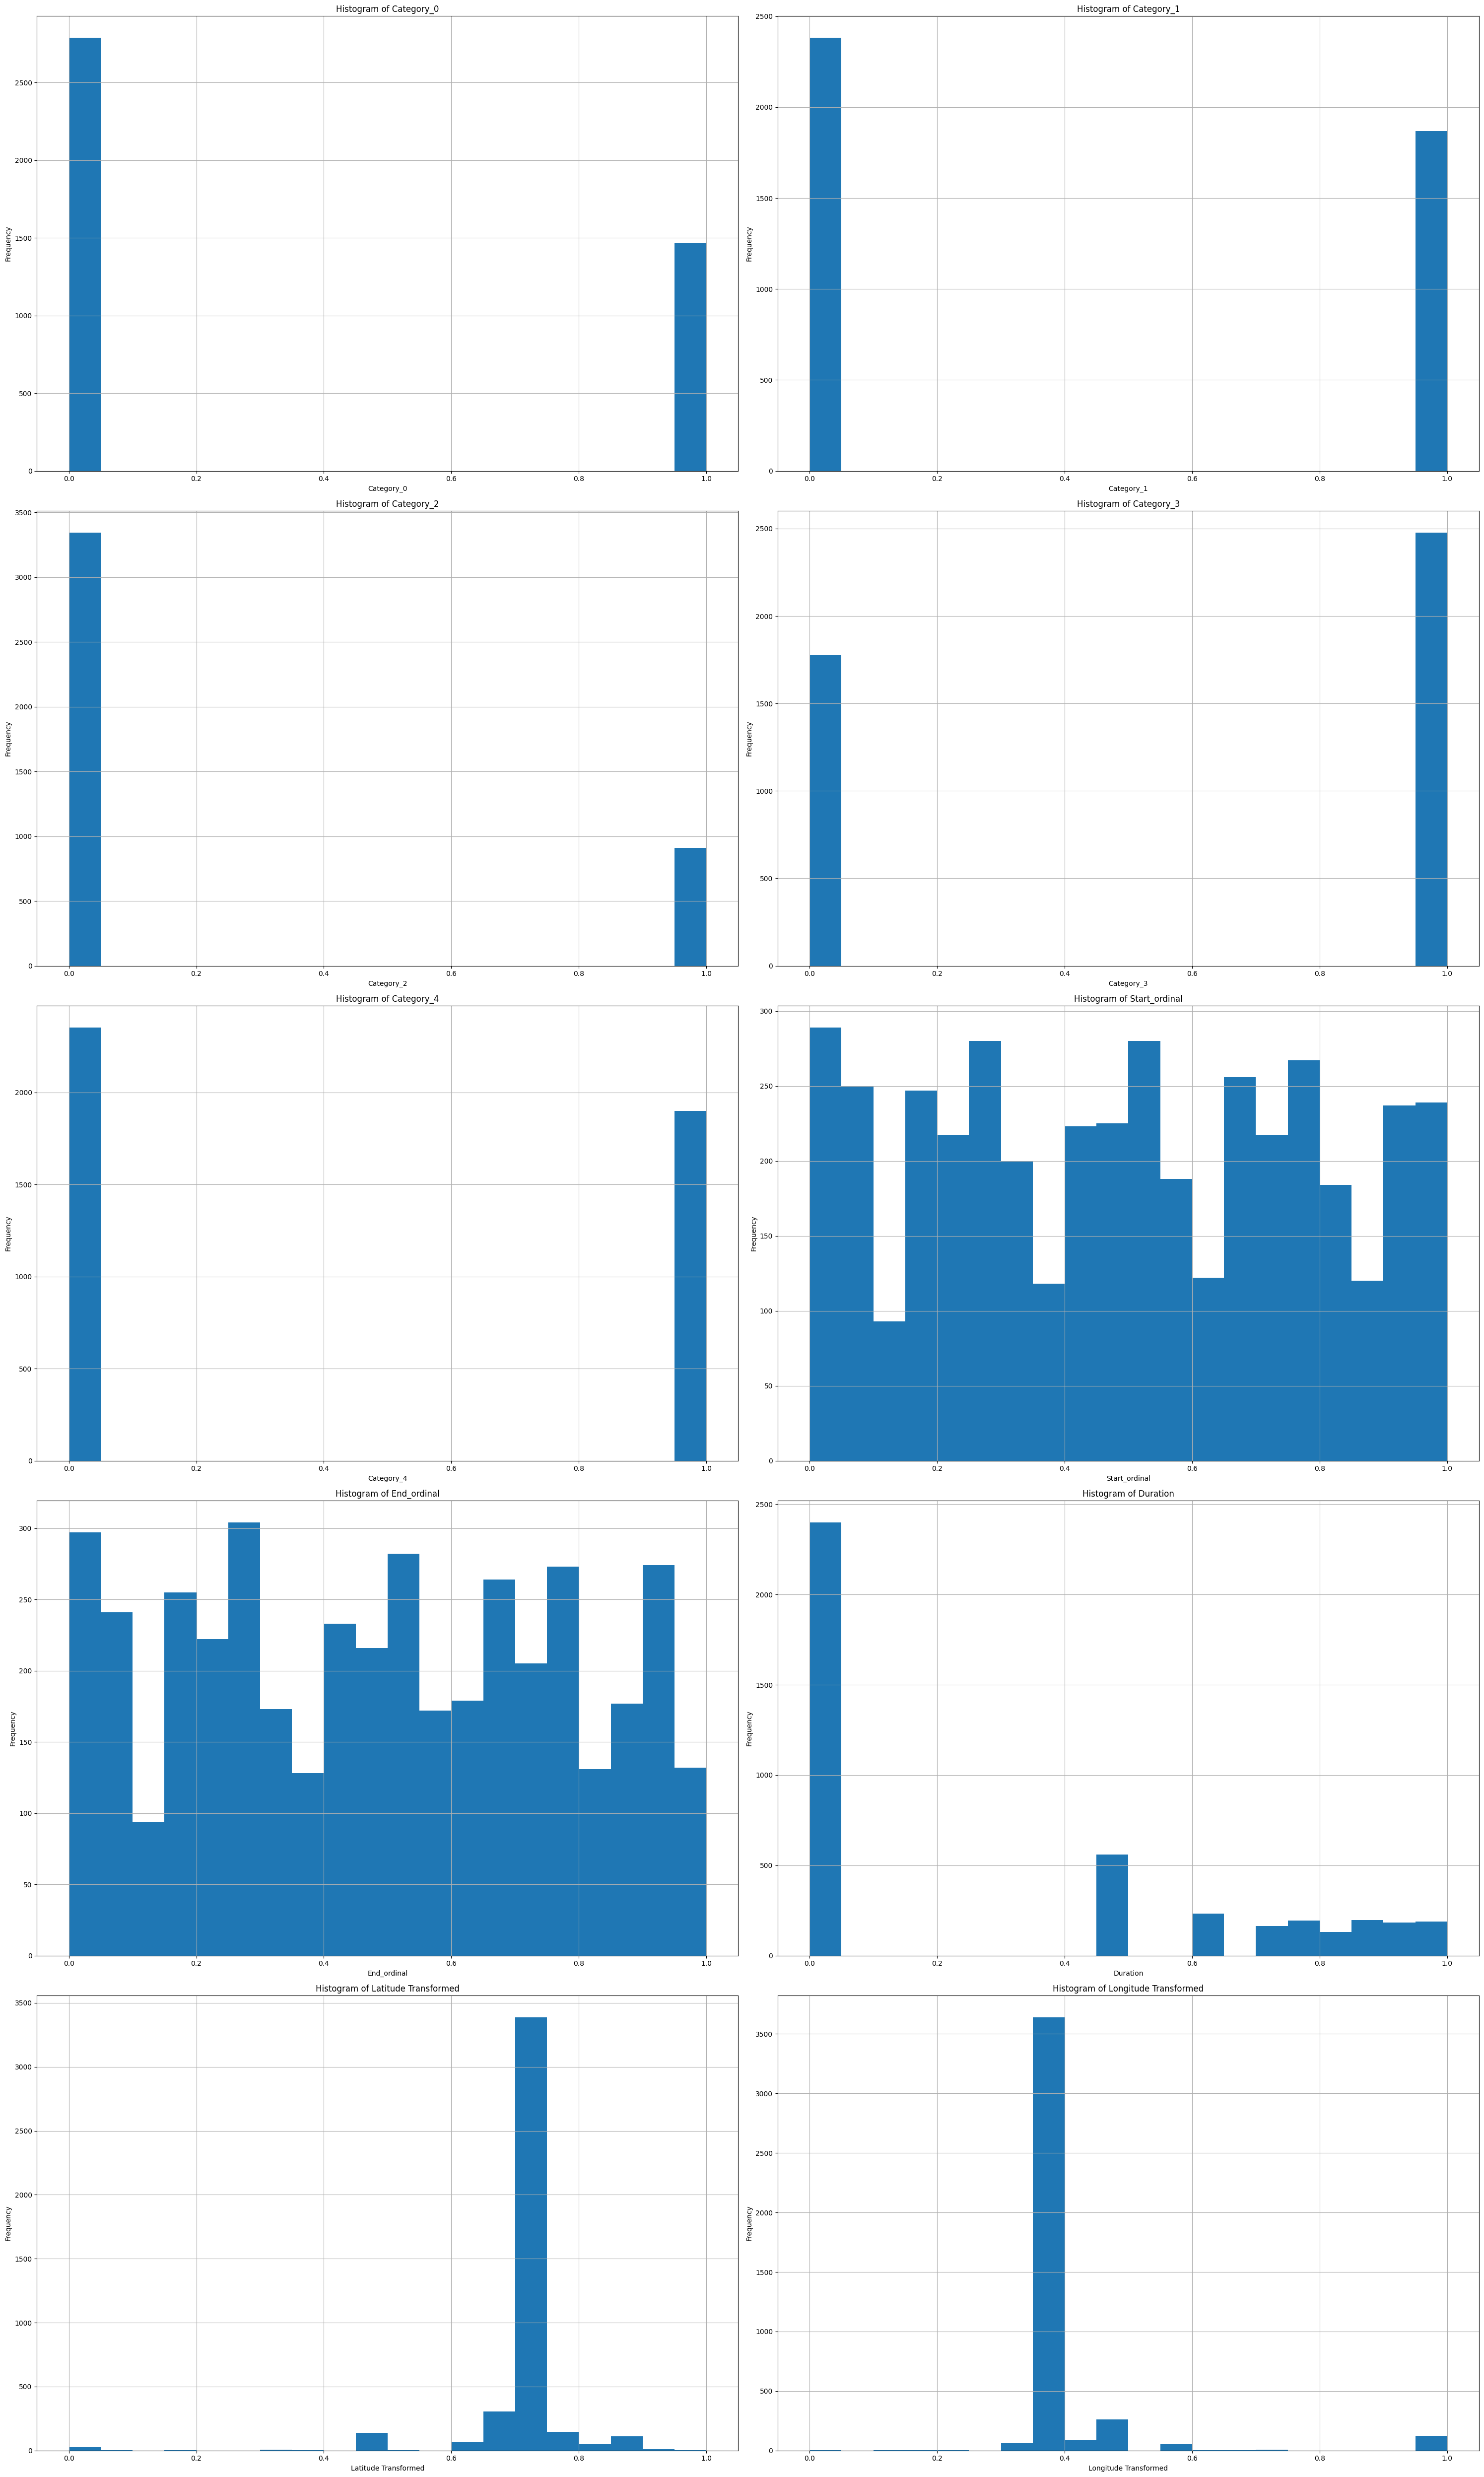

In [134]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude Transformed','Longitude Transformed']
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(30, 50))
num=0
for column in cols:

    ax=axes.flatten()[num] # Adjust figure size as needed
    ax.hist(events_copy[column], bins=20)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)
    num+=1

plt.tight_layout()  # Adjust subplot layout
plt.show()

<b>The dataset is split into train(80%) and test(20%). The target variables are Latitude and Longitude</b>

In [135]:
X_cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Location','Category']
Y_cols=['Latitude','Longitude','Latitude Transformed','Longitude Transformed']

X_train,X_test,Y_train,Y_test=train_test_split(events_copy[X_cols],events_copy[Y_cols],test_size=0.2,random_state=100)

# Y_train['Latitude'] = pd.to_numeric(Y_train['Latitude'])
# Y_train['Longitude'] = pd.to_numeric(Y_train['Longitude'])

In [136]:
X_train.reset_index(drop=True,inplace=True)
Y_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
Y_test.reset_index(drop=True,inplace=True)

<b>Implementing Embedding model to extract train data embeddings from second last layer</b>

In [203]:
cols_X=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration']
cols_Y=['Latitude Transformed','Longitude Transformed']
inputs = Input(shape=(8,))

# Fully connected layers using 64 and 32 nodes
x = Dense(20, activation='relu')(inputs)
x = Dense(10, activation='relu')(x)


# Output layer
output = Dense(2, activation=None)(x)  # Output 2 dimensions for longitude and latitude

model = Model(inputs=inputs, outputs=output)

model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_35 (Dense)            (None, 20)                180       
                                                                 
 dense_36 (Dense)            (None, 10)                210       
                                                                 
 dense_37 (Dense)            (None, 2)                 22        
                                                                 
Total params: 412 (1.61 KB)
Trainable params: 412 (1.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [204]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# history=model.fit(X_train[cols_X], Y_train[cols_Y], epochs=100, batch_size=10, validation_split=0.20)
history = model.fit(X_train[cols_X], Y_train[cols_Y], epochs=50, batch_size=10, validation_split=0.15, callbacks=[early_stopping])

Epoch 1/50
289/289 [==============================] - 1s 2ms/step - loss: 0.0927 - accuracy: 0.6619 - val_loss: 0.0149 - val_accuracy: 0.9569
Epoch 2/50
289/289 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 0.9647 - val_loss: 0.0121 - val_accuracy: 0.9569
Epoch 3/50
289/289 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.9647 - val_loss: 0.0115 - val_accuracy: 0.9569
Epoch 4/50
289/289 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9647 - val_loss: 0.0114 - val_accuracy: 0.9569
Epoch 5/50
289/289 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9647 - val_loss: 0.0114 - val_accuracy: 0.9569
Epoch 6/50
289/289 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 0.9647 - val_loss: 0.0112 - val_accuracy: 0.9569
Epoch 7/50
289/289 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 0.9647 - val_loss: 0.0117 - val_accuracy: 0.9569
Epoch 

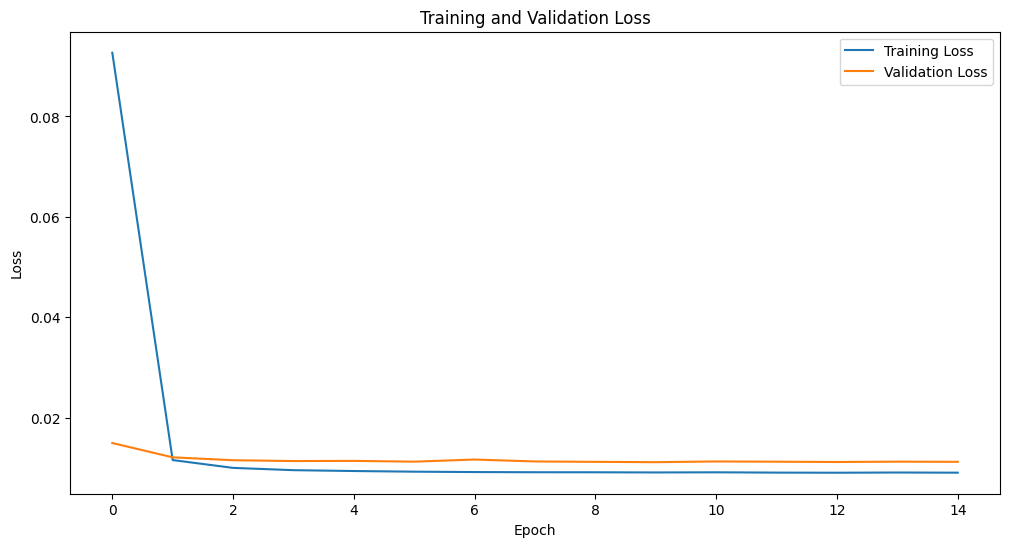

In [205]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



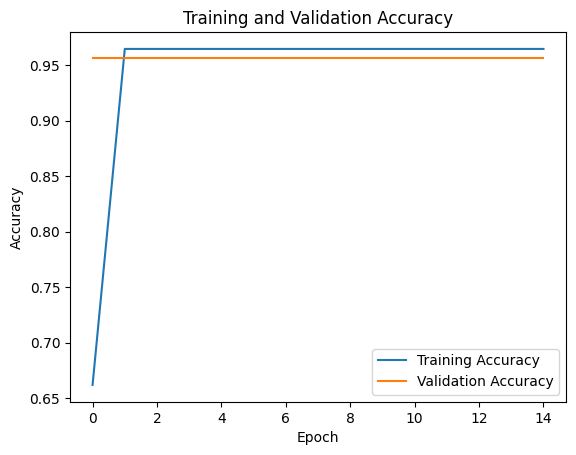

In [206]:
# Plot training and validation accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [224]:
score = model.evaluate(X_test[cols_X], Y_test[cols_Y])

print('Test loss:', score[0])
print('Test accuracy:', score[1])

27/27 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9577
Test loss: 0.010441276244819164
Test accuracy: 0.9576968550682068


In [208]:
# Extract embeddings for training data
embedding_model = Model(inputs=model.input, outputs=model.layers[-2].output)
train_embeddings = embedding_model.predict(X_train[cols_X])

107/107 [==============================] - 0s 851us/step


<b>Nearest neighbors is used to find the neighbors for a data point. The neighbors can be used to suggest the locations for specific category of event</b>

In [209]:
nn_events = NearestNeighbors(n_neighbors=8, metric='euclidean')
nn_events.fit(train_embeddings)

NearestNeighbors(metric='euclidean', n_neighbors=8)

In [210]:

test_embeddings = embedding_model.predict(X_test[cols_X])

27/27 [==============================] - 0s 957us/step


In [221]:
predicted={'Latitude Transformed':[],'Longitude Transformed':[]}
neighbour_dict={'Category':[],'Latitude':[],'Longitude':[],'Location':[]}
distances, indices = nn_events.kneighbors(test_embeddings)
count=0
for i in range(len(test_embeddings)):


    neighbor_indices = indices[i]
    min_d=min(distances[i])

    min_ind=np.where(distances[i]==min_d)[0][0]

    predicted['Latitude Transformed'].append(Y_train.iloc[neighbor_indices[min_ind]]['Latitude Transformed'])
    predicted['Longitude Transformed'].append(Y_train.iloc[neighbor_indices[min_ind]]['Longitude Transformed'])

    for j in neighbor_indices:
        #Each neighbor point is obtained for every X_test_scaled record
        neighbour_point=X_train.iloc[j]
        category=neighbour_point['Category']
        loc=neighbour_point['Location']

        neighbour_dict['Category'].append(category)
        neighbour_dict['Latitude'].append(Y_train.iloc[j]['Latitude'])
        neighbour_dict['Longitude'].append(Y_train.iloc[j]['Longitude'])
        neighbour_dict['Location'].append(loc)

        if Y_train.iloc[j]['Latitude']==Y_test.iloc[i]['Latitude'] and Y_train.iloc[j]['Longitude']==Y_test.iloc[i]['Longitude']:
          count+=1


In [212]:
neighbour_df=pd.DataFrame(neighbour_dict)
neighbour_df

,Category,Latitude,Longitude,Location
0,Filming - Student,-37.802376,144.965889,"Piazza Italia, Melbourne, Australia"
1,Filming - Student,-37.825916,144.974386,"Kings Domain, Melbourne, Australia"
2,Filming - Student,-37.852686,145.680012,"Bridges, Melbourne, Australia"
3,Filming - Student,-37.852686,145.680012,"Bridges, Melbourne, Australia"
4,Filming - Student,-37.825916,144.974386,"Kings Domain, Melbourne, Australia"
...,...,...,...,...
6803,Filming - TVC,-37.815687,144.958149,"William Street, Melbourne, Australia"
6804,Filming - TVC,-37.817593,144.957723,"Church Lane, Melbourne, Australia"
6805,Filming - TVC,-37.815133,144.944919,"Harbour Esplanade, Melbourne, Australia"
6806,Filming - TVC,-37.852686,145.680012,"Bridges, Melbourne, Australia"


In [213]:
predicted=pd.DataFrame(predicted)
mse = mean_squared_error(Y_test[cols_Y], predicted)
mae = mean_absolute_error(Y_test[cols_Y], predicted)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

0.021274835595584338
0.05769169807862197
0.14585895788598086


## **PREVIOUS**

<b>Preparing dataset for KNN model</b><br>
Here, the 8 nearest neighbours for a given test record will determine the 8 most probable event locations based on the event category, start date, end date and duration of the event. <br>
The dataset is split into train(80%) and test(20%)<br>
The target variables are Latitude and Longitude</b>

In [ ]:
Y=events_lat_lon[['Latitude','Longitude']]
X=events_lat_lon[['Category','Start_ordinal','End_ordinal','Duration','Location']]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

<b>Plotting the top 8 locations for each event category</b>

In [ ]:
print(top_locations)

{'Filming - Movie': array(['Inner Suburb Locations, Melbourne, Australia',
       'Flagstaff Gardens, Melbourne, Australia',
       'Carlton Gardens, Melbourne, Australia',
       'Fawkner Park, Melbourne, Australia',
       'Little Bourke Street, Melbourne, Australia',
       'Collins Street, Melbourne, Australia',
       'Little Collins Street, Melbourne, Australia',
       'Market Street, Melbourne, Australia'], dtype=object), 'Filming - Other': array(['Treasury Gardens, Melbourne, Australia',
       'Fitzroy Gardens, Melbourne, Australia',
       'Batman Park, Melbourne, Australia',
       'Hosier Lane, Melbourne, Australia',
       'Bridges, Melbourne, Australia',
       'Flinders St Station, Melbourne, Australia',
       'Inner Suburb Locations, Melbourne, Australia',
       'Parks, Melbourne, Australia'], dtype=object), 'Filming - Photo shoot': array(['Inner Suburb Locations, Melbourne, Australia',
       'Spring Street, Melbourne, Australia',
       'Collins Street, Melbourne, 

<b>Keeping X_train and X_test as backup dataframes with Location</b>

In [ ]:
# Loc_train=X_train['Location']
X_train_1=X_train.drop(['Location'],axis=1)
# Loc_test=X_test['Location']
X_test_1=X_test.drop(['Location'],axis=1)


<b>Encoded Category values using Binary encoding</b>

In [ ]:
binary_encoder = BinaryEncoder(cols=['Category'])

# Fit and transform the DataFrame
binary_encoder.fit(X_train_1)
X_train_1=binary_encoder.transform(X_train_1)
X_test_1=binary_encoder.transform(X_test_1)

In [ ]:
X_train_1.head()

,Category_0,Category_1,Category_2,Category_3,Category_4,Start_ordinal,End_ordinal,Duration
2206,0,0,0,0,1,735505,735505,0
4016,0,0,0,1,0,735797,735798,1
4699,0,0,0,1,1,736603,736603,0
4006,0,0,0,1,0,736363,736385,22
4312,0,0,0,1,1,735280,735280,0


<b>Normalized the train and test datasets using MinMax Scaling</b>

In [ ]:
col_names = X_train_1.columns

scaler = MinMaxScaler()
scaler.fit(X_train_1[col_names])
scaled_train = scaler.transform(X_train_1[col_names])
X_train_scaled = pd.DataFrame(scaled_train, columns=col_names)

scaled_test = scaler.transform(X_test_1[col_names])
X_test_scaled = pd.DataFrame(scaled_test, columns=col_names)


In [ ]:
X_train_scaled.head()

,Category_0,Category_1,Category_2,Category_3,Category_4,Start_ordinal,End_ordinal,Duration
0,0.0,0.0,0.0,0.0,1.0,0.183536,0.178382,0.000000
1,0.0,0.0,0.0,1.0,0.0,0.380567,0.372679,0.002778
2,0.0,0.0,0.0,1.0,1.0,0.924426,0.906499,0.000000
3,0.0,0.0,0.0,1.0,0.0,0.762483,0.761936,0.061111
4,0.0,0.0,0.0,1.0,1.0,0.031714,0.029178,0.000000


<b>KNeighborsRegressor is used to find the neighbors for a data point. The neighbors can be used to suggest the locations for specific category of event</b>

In [ ]:
knn_model_event = KNeighborsRegressor(n_neighbors=8) #8 neighbors are considered
knn_model_event.fit(X_train_scaled, Y_train)

Y_pred = knn_model_event.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.012682832178189543


<b>Matching the index values of X_train_scaled and X_train</b>

In [ ]:
X_train.index=X_train_scaled.index

In [ ]:
X_test.index=X_test_scaled.index

In [ ]:
Y_train.index=X_train_scaled.index

In [ ]:
Y_test.index=X_test_scaled.index

<b>Obtaining the neighbors and neighbors' locations for X_test and finding the number of times the top locations were selected for a given event</b>

In [ ]:
count_dict={}
neighbour_dict={'Category':[],'Latitude':[],'Longitude':[],'Location':[]}



distances, indices = knn_model_event.kneighbors(X_test_scaled)
for i in range(len(X_test_scaled)):
    per=0

    neighbor_indices = indices[i]

    for j in neighbor_indices:
        #Each neighbor point is obtained for every X_test_scaled record
        neighbour_point=X_train.iloc[j]
        category=neighbour_point['Category']
        loc=neighbour_point['Location']

        neighbour_dict['Category'].append(category)
        neighbour_dict['Latitude'].append(Y_train.iloc[j]['Latitude'])
        neighbour_dict['Longitude'].append(Y_train.iloc[j]['Longitude'])
        neighbour_dict['Location'].append(loc)


        if loc in top_locations[category]:
            per+=1
    if category not in count_dict:
        count_dict[category]=[(per/8)*100]
    else:
        count_dict[category].append((per/8)*100)



In [ ]:
neighbour_df=pd.DataFrame(neighbour_dict)
neighbour_df.head(15)

,Category,Latitude,Longitude,Location
0,Filming - Student,-37.816917,144.965432,"Flinders Lane, Melbourne, Australia"
1,Filming - Student,-37.816415,144.965438,"Centre Place, Melbourne, Australia"
2,Filming - Student,-37.781268,144.951681,"Royal Park, Melbourne, Australia"
3,Filming - Student,-37.825916,144.974386,"Kings Domain, Melbourne, Australia"
4,Filming - Student,-37.812684,144.980505,"Fitzroy Gardens, Melbourne, Australia"
5,Filming - Student,-37.817784,144.966020,"Campbell Arcade, Melbourne, Australia"
6,Filming - Student,-37.824925,144.971607,"Tom's Block, Melbourne, Australia"
7,Filming - Student,-37.852686,145.680012,"Bridges, Melbourne, Australia"
8,Public Event - Parade,-37.815111,144.964045,"Little Collins Street, Melbourne, Australia"
9,Public Event - Parade,-37.818186,144.966477,"Flinders Street, Melbourne, Australia"


In [ ]:
neighbour_df.shape

(6808, 4)

In [ ]:
print("The top locations were selected on average: ")
for i,j in count_dict.items():
    avg=round(sum(j)/len(j),2)
    percentage_in_train=round(X_train['Category'].value_counts().loc[i]/len(X_train)*100,2)
    variation=sum(location_counts['Category']==i)
    print(f"{avg}% of times under {i}-({percentage_in_train}%,{variation}) Category")

The top locations were selected on average: 
53.75% of times under Filming - Student-(1.65%,34) Category
52.5% of times under Public Event - Parade-(2.47%,27) Category
35.38% of times under Public Event - Non Ticketed-(22.02%,115) Category
60.58% of times under Public Event - Cycling-(1.76%,24) Category
38.34% of times under Filming - TVC-(7.56%,83) Category
60.73% of times under Public Event - Run/Walk-(12.53%,44) Category
72.1% of times under Promotion-(12.91%,36) Category
98.7% of times under Wedding-(14.47%,12) Category
67.76% of times under Public Event - Memorial-(2.0%,20) Category
40.57% of times under Filming - TV Series-(6.23%,60) Category
48.86% of times under Public Event - Ticketed-(4.97%,52) Category
46.2% of times under Public Event - Low Impact Activity-(2.79%,44) Category
75.0% of times under Filming - Movie-(0.62%,12) Category
48.21% of times under Filming - Other-(1.09%,27) Category
70.83% of times under Public Event - Music-(1.26%,19) Category
68.75% of times under P

#### PARKING

In [ ]:
parking_df.head()

,lastupdated,status_timestamp,zone_number,status_description,kerbsideid,location
0,2023-12-14T04:45:34+00:00,2023-12-14T03:41:25+00:00,7695.0,Unoccupied,22959,"-37.81844776554182, 144.95938672872117"
1,2023-12-14T04:45:34+00:00,2023-12-13T06:21:58+00:00,7939.0,Unoccupied,10136,"-37.8099909364941, 144.95263753679632"
2,2023-12-14T23:45:34+00:00,2023-12-14T23:35:02+00:00,NaN,Unoccupied,6527,"-37.81060096851364, 144.95642622505966"
3,2023-12-14T23:45:34+00:00,2023-12-14T22:39:46+00:00,NaN,Unoccupied,6526,"-37.810581463657826, 144.95649292476088"
4,2023-12-18T04:45:34+00:00,2023-12-17T23:47:54+00:00,7310.0,Unoccupied,6497,"-37.81044576734748, 144.95648958199024"


In [ ]:
parking_df.shape

(6243, 6)

In [ ]:
parking_df.nunique()

lastupdated             35
status_timestamp      5825
zone_number            510
status_description       2
kerbsideid            6243
location              5876
dtype: int64

<b>Creating Latitude and Longitude features from Location</b>

In [ ]:
parking_lat=[]
parking_lon=[]

for i in parking_df['location']:
    x,y=i.split(",")
    parking_lat.append(float(x.strip()))
    parking_lon.append(float(y.strip()))

In [ ]:
parking_df['Latitude']=parking_lat
parking_df['Longitude']=parking_lon
parking_df.head()

,lastupdated,status_timestamp,zone_number,status_description,kerbsideid,location,Latitude,Longitude
0,2023-12-14T04:45:34+00:00,2023-12-14T03:41:25+00:00,7695.0,Unoccupied,22959,"-37.81844776554182, 144.95938672872117",-37.818448,144.959387
1,2023-12-14T04:45:34+00:00,2023-12-13T06:21:58+00:00,7939.0,Unoccupied,10136,"-37.8099909364941, 144.95263753679632",-37.809991,144.952638
2,2023-12-14T23:45:34+00:00,2023-12-14T23:35:02+00:00,NaN,Unoccupied,6527,"-37.81060096851364, 144.95642622505966",-37.810601,144.956426
3,2023-12-14T23:45:34+00:00,2023-12-14T22:39:46+00:00,NaN,Unoccupied,6526,"-37.810581463657826, 144.95649292476088",-37.810581,144.956493
4,2023-12-18T04:45:34+00:00,2023-12-17T23:47:54+00:00,7310.0,Unoccupied,6497,"-37.81044576734748, 144.95648958199024",-37.810446,144.956490


In [ ]:
parking_df.isna().sum()

lastupdated             0
status_timestamp        0
zone_number           486
status_description      0
kerbsideid              0
location                0
Latitude                0
Longitude               0
dtype: int64

<b>Only keeping the Longitude and Latitude features</b>

In [ ]:
parking_df.drop(['kerbsideid','lastupdated','status_timestamp','status_description','zone_number','location'],axis=1,inplace=True)


In [ ]:
parking_df.head()

,Latitude,Longitude
0,-37.818448,144.959387
1,-37.809991,144.952638
2,-37.810601,144.956426
3,-37.810581,144.956493
4,-37.810446,144.956490


<b>Scaling the dataframe using MinMax Scaling</b>

In [ ]:
col_names=parking_df.columns


scaler = MinMaxScaler()
scaler.fit(neighbour_df[['Latitude','Longitude']])
neighbour_scaled_df=pd.DataFrame(scaler.transform(neighbour_df[['Latitude','Longitude']]),columns=['Latitude','Longitude'])


scaled_train = scaler.transform(parking_df[col_names])
parking_scaled = pd.DataFrame(scaled_train, columns=col_names)



In [ ]:
parking_scaled.head()

,Latitude,Longitude
0,0.787895,0.360010
1,0.800145,0.354016
2,0.799261,0.357381
3,0.799290,0.357440
4,0.799486,0.357437


In [ ]:
neighbour_scaled_df.head()

,Latitude,Longitude
0,0.790112,0.365379
1,0.790839,0.365384
2,0.841752,0.353167
3,0.777076,0.373331
4,0.796244,0.378766


<b>NearestNeighbors Algorithm to find 5 neighbors(parking locations) for each event record</b><br>
Here, the 5 neighbors for a given test record will determine the 5 closest parking locations given the longitude and latitude of an event location

In [ ]:

knn_model_parking = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn_model_parking.fit(parking_scaled)


NearestNeighbors()

In [ ]:
distances, indices = knn_model_parking.kneighbors(neighbour_scaled_df)

geolocator = Nominatim(user_agent="parking_locator",timeout=5)

parking_neighbour_dict={'Event Category':[],'Event Location':[],'Event Latitude':[],'Event Longitude':[],'Parking Location':[],'Parking Latitude':[],'Parking Longitude':[]}

for i in range(len(neighbour_scaled_df)):
    neighbour_indices = indices[i]
    for j in range(len(neighbour_indices)):
        #Each neighbor point(parking spot) is obtained for every neighbour_scaled_df record
        parking_neighbour=parking_df.iloc[neighbour_indices[j]]
        parking_lat=parking_neighbour['Latitude']
        parking_lon=parking_neighbour['Longitude']
        if parking_lat in parking_neighbour_dict['Parking Latitude'] and parking_lon in parking_neighbour_dict['Parking Longitude']:
            ind=parking_neighbour_dict['Parking Latitude'].index(parking_lat)
            loc=parking_neighbour_dict['Parking Location'][ind]
            parking_neighbour_dict['Parking Location'].append(loc)
        else:
            try:
                location = geolocator.reverse((parking_lat, parking_lon), exactly_one=True)
                if location:
                    parking_neighbour_dict['Parking Location'].append(location.address)

            except Exception as e:
                print(f"Error: {e}")
        parking_neighbour_dict['Parking Latitude'].append(parking_lat)
        parking_neighbour_dict['Parking Longitude'].append(parking_lon)

        parking_neighbour_dict['Event Location'].append(neighbour_df['Location'].iloc[i])
        parking_neighbour_dict['Event Category'].append(neighbour_df['Category'].iloc[i])
        parking_neighbour_dict['Event Latitude'].append(neighbour_df['Latitude'].iloc[i])
        parking_neighbour_dict['Event Longitude'].append(neighbour_df['Longitude'].iloc[i])



event_parking_df=pd.DataFrame(parking_neighbour_dict)
event_parking_df.head()


,Event Category,Event Location,Event Latitude,Event Longitude,Parking Location,Parking Latitude,Parking Longitude
0,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Punt Hill Apartment Hotel, 267, Flinders Lane,...",-37.816950,144.965422
1,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Tomasetti Building, 277-279, Flinders Lane, Ea...",-37.817009,144.965221
2,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Tomasetti Building, 277-279, Flinders Lane, Ea...",-37.817026,144.965165
3,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Viva Physiotherapy, 289, Flinders Lane, East E...",-37.817078,144.964986
4,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Ross House, 247-251, Flinders Lane, East End T...",-37.816804,144.965920


<b>The event_parking_df contains the information of all events and the 8 most likely locations they should take place along with the 5 closest parking spot locations around each event.</b>

In [ ]:
event_parking_df.drop_duplicates(keep='first', inplace=True)
event_parking_df.head()

,Event Category,Event Location,Event Latitude,Event Longitude,Parking Location,Parking Latitude,Parking Longitude
0,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Punt Hill Apartment Hotel, 267, Flinders Lane,...",-37.816950,144.965422
1,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Tomasetti Building, 277-279, Flinders Lane, Ea...",-37.817009,144.965221
2,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Tomasetti Building, 277-279, Flinders Lane, Ea...",-37.817026,144.965165
3,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Viva Physiotherapy, 289, Flinders Lane, East E...",-37.817078,144.964986
4,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Ross House, 247-251, Flinders Lane, East End T...",-37.816804,144.965920


In [ ]:
event_parking_df.shape

(3046, 7)

<b>Displaying the event locations and parking locations based on event categories using folium</b>

In [ ]:
def display_event_parking(event_name):

    plotted_coordinates=[]
    plotted_name=[]

    filtered_df = event_parking_df[event_parking_df['Event Category'] == event_name]
    m = folium.Map(location=[event_parking_df['Event Latitude'].mean(), event_parking_df['Event Longitude'].mean()], zoom_start=10)
    legend_html = """
    <div style="position: fixed;
                bottom: 50px; left: 50px; width: 150px; height: 70px;
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white; opacity: 0.8;">
          <p style="text-align:center; margin: 0;"><strong>Legend</strong></p>
          <p style="margin: 0;">Event Location: <span style="color:lightblue">&#9679;</span></p>
          <p style="margin: 0;">Parking Location: <span style="color:green">&#9679;</span></p>
    </div>
    """

    # Add legend HTML to the map
    m.get_root().html.add_child(folium.Element(legend_html))

    title_html = """
    <h3 style="text-align: center; margin: 10px 0;">Event and Parking Locations</h3>
    """
    m.get_root().html.add_child(folium.Element(title_html))

    for idx, row in filtered_df.iterrows():

        coordinates = (row['Event Latitude'], row['Event Longitude'])
        if coordinates not in plotted_coordinates and row['Event Location'] not in plotted_name:
            folium.Marker(coordinates, popup=row['Event Location'], icon=folium.Icon(color='blue')).add_to(m)
            plotted_coordinates.append(coordinates)
            plotted_name.append(row['Event Location'])

    # Adding markers for parking locations
    for idx, row in filtered_df.iterrows():
        coordinates = (row['Parking Latitude'], row['Parking Longitude'])
        if coordinates not in plotted_coordinates:
            folium.Marker(coordinates,popup=row['Parking Location'], icon=folium.Icon(color='green')).add_to(m)
            plotted_coordinates.append(coordinates)
    display(m)

# Creating search box widget
event_search_box = widgets.Dropdown(options=event_parking_df['Event Category'].unique(), description='Event Category:')
interact(display_event_parking, event_name=event_search_box)


interactive(children=(Dropdown(description='Event Category:', options=('Filming - Student', 'Public Event - Pa…

<function __main__.display_event_parking(event_name)>

<b>The events are displayed using blue colored markers and the parking spots are displayed using green colored markers.</b>

<b>BANNER</b>

In [ ]:
banner_df.head()

,asset_number,asset_description,banner_pole_type,book_group,model_descr_lupvalue,model_no_lupvalue,lat,lon,location
0,1110368,Standard Banner Pole - Lansdowne St: Wellingto...,6.0,62.0,Banner Pole - Standard Banner,310101-004,-37.814268,144.977428,"-37.81426836404757, 144.97742756833915"
1,1110057,Banner Pole - Super Banner Pole,2.0,79.0,Banner Pole - Super Banner Pole,310101-001,-37.809428,144.966548,"-37.80942811378078, 144.96654780374206"
2,1110093,Banner Pole - Super Banner Pole,2.0,59.0,Banner Pole - Super Banner Pole,310101-001,-37.800985,144.957241,"-37.80098530840636, 144.9572409533404"
3,1110096,Banner Pole - Super Banner Pole,2.0,59.0,Banner Pole - Super Banner Pole,310101-001,-37.800974,144.957269,"-37.80097426523944, 144.95726931044308"
4,1110108,Banner Pole - Super Banner Pole,2.0,59.0,Banner Pole - Super Banner Pole,310101-001,-37.801019,144.957138,"-37.801019397609785, 144.95713847866782"


In [ ]:
banner_df.shape

(859, 9)

In [ ]:
banner_df.nunique()

asset_number            859
asset_description        85
banner_pole_type          6
book_group              104
model_descr_lupvalue      5
model_no_lupvalue         5
lat                     859
lon                     859
location                859
dtype: int64

In [ ]:
banner_df.isna().sum()

asset_number             0
asset_description        0
banner_pole_type         3
book_group               3
model_descr_lupvalue    46
model_no_lupvalue       46
lat                      0
lon                      0
location                 0
dtype: int64

<b>'model_no_lupvalue' feature and 'model_descr_lupvalue' feature are null together</b>

In [ ]:
banner_df[banner_df['model_no_lupvalue'].isna()]

,asset_number,asset_description,banner_pole_type,book_group,model_descr_lupvalue,model_no_lupvalue,lat,lon,location
32,1581126,Standard Banner Pole - William Street between ...,6.0,19.0,NaN,NaN,-37.822037,144.955380,"-37.82203699050504, 144.95537971879477"
44,1110333,Super Banner Pole Brackets - Town Hall Portico,7.0,28.0,NaN,NaN,-37.815069,144.966480,"-37.81506866750379, 144.9664799355281"
54,1110842,Super Banner Pole Brackets - Town Hall Portico,7.0,28.0,NaN,NaN,-37.815164,144.966562,"-37.81516417245761, 144.96656228468797"
77,1110698,Catenary Banner - Little Bourke St (Chinatown)...,8.0,117.0,NaN,NaN,-37.812430,144.965712,"-37.81242973728763, 144.96571210660514"
84,1110154,Catenary Banner - Little Bourke St (Chinatown)...,8.0,117.0,NaN,NaN,-37.812006,144.967132,"-37.81200583657629, 144.96713216117402"
87,1110596,Catenary Banner - Little Bourke St (Chinatown)...,8.0,18.0,NaN,NaN,-37.811564,144.968628,"-37.81156393295752, 144.96862754940852"
89,1581125,Standard Banner Pole - Niagara Lane between Lo...,6.0,19.0,NaN,NaN,-37.823894,144.956534,"-37.823894156038484, 144.95653363055376"
95,1110151,Catenary Banner - Little Bourke St (Chinatown)...,8.0,117.0,NaN,NaN,-37.811897,144.967335,"-37.81189696661143, 144.96733529508157"
97,1110591,Catenary Banner - Little Bourke St (Chinatown)...,8.0,18.0,NaN,NaN,-37.811391,144.969072,"-37.811391273840655, 144.96907199036215"
119,1110152,Catenary Banner - Little Bourke St (Chinatown)...,8.0,117.0,NaN,NaN,-37.811940,144.967354,"-37.81193955282661, 144.96735389196235"


<b>Checking the 'model_descr_lupvalue' for each 'banner_pole_type'</b>

In [ ]:
banner_df['banner_pole_type'].value_counts()

banner_pole_type
6.0    378
2.0    362
4.0     59
8.0     36
5.0     14
7.0      7
Name: count, dtype: int64

In [ ]:
print(banner_df.loc[banner_df['banner_pole_type']==6.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==2.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==4.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==8.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==5.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==7.0,'model_descr_lupvalue'].unique())

['Banner Pole - Standard Banner' nan]
['Banner Pole - Super Banner Pole' 'Banner Pole - Spinner'
 'Banner Pole - Standard Banner']
['Banner Pole - Type 1 - Docklands']
[nan]
['Banner Pole - Type 2 - Docklands']
[nan]


<b>Replacing the nan valus for 7.0 and 8.0 banner_pole_type using the first part of the asset_description</b>

In [ ]:
banner_df['model_descr_lupvalue']=banner_df.apply(lambda row: row['asset_description'].split(' - ')[0] if row['banner_pole_type']==7.0 else row['model_descr_lupvalue'], axis=1)


In [ ]:
banner_df['model_descr_lupvalue']=banner_df.apply(lambda row: row['asset_description'].split(' - ')[0] if row['banner_pole_type']==8.0 else row['model_descr_lupvalue'], axis=1)


<b>6.0 banner_pole_type is always Standard Banner</b>

In [ ]:
banner_df['model_descr_lupvalue'].fillna('Banner Pole - Standard Banner',inplace=True)

In [ ]:
print(banner_df.loc[banner_df['banner_pole_type']==6.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==2.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==4.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==8.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==5.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==7.0,'model_descr_lupvalue'].unique())

['Banner Pole - Standard Banner']
['Banner Pole - Super Banner Pole' 'Banner Pole - Spinner'
 'Banner Pole - Standard Banner']
['Banner Pole - Type 1 - Docklands']
['Catenary Banner']
['Banner Pole - Type 2 - Docklands']
['Super Banner Pole Brackets']


<b>Checking banner_pole_type=2.0 with a Standard Banner model_descr_lupvalue which does not match with asset_description</b>

In [ ]:
banner_df[(banner_df['banner_pole_type']==2.0) & (banner_df['model_descr_lupvalue']=='Banner Pole - Standard Banner')]


,asset_number,asset_description,banner_pole_type,book_group,model_descr_lupvalue,model_no_lupvalue,lat,lon,location
195,1109886,Super Banner Pole - Bourke St: Exhibition St -...,2.0,7.0,Banner Pole - Standard Banner,310101-004,-37.81263,144.968421,"-37.812629612297506, 144.9684207947835"


In [ ]:
banner_df.iloc[195,[4,5]]=['Banner Pole - Super Banner Pole','310101-001']

In [ ]:
print(banner_df.loc[banner_df['banner_pole_type']==6.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==2.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==4.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==8.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==5.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==7.0,'model_descr_lupvalue'].unique())

['Banner Pole - Standard Banner']
['Banner Pole - Super Banner Pole' 'Banner Pole - Spinner']
['Banner Pole - Type 1 - Docklands']
['Catenary Banner']
['Banner Pole - Type 2 - Docklands']
['Super Banner Pole Brackets']


<b>Saving the 'banner_pole_type' and description in a dictionary</b>

In [ ]:
banner_name_dict={6.0:['Banner Pole - Standard Banner'],2.0:['Banner Pole - Super Banner Pole' 'Banner Pole - Spinner'],4.0:['Banner Pole - Type 1 - Docklands'],5.0:['Banner Pole - Type 2 - Docklands'],7.0:['Super Banner Pole Brackets'],8.0:['Catenary Banner']}

<b>Keeping only the banner_pole_type, lat and lon features</b>

In [ ]:
banner_df.drop(['asset_number','asset_description','book_group','model_descr_lupvalue','model_no_lupvalue','location'],axis=1,inplace=True)
banner_df.head()

,banner_pole_type,lat,lon
0,6.0,-37.814268,144.977428
1,2.0,-37.809428,144.966548
2,2.0,-37.800985,144.957241
3,2.0,-37.800974,144.957269
4,2.0,-37.801019,144.957138


In [ ]:
banner_df.columns=['Banner Pole Type','Latitude','Longitude']

<b>Scaling the Latitude and Longitude using MinMax scaler</b>

In [ ]:
col_names = ['Latitude','Longitude']
temp_df=event_parking_df.copy()[['Event Latitude','Event Longitude']]
temp_df.columns=col_names


scaler = MinMaxScaler()
scaler.fit(temp_df)
neighbour_scaled_banner=pd.DataFrame(scaler.transform(temp_df),columns=col_names)

scaled_train = scaler.transform(banner_df[col_names])
banner_scaled = pd.DataFrame(scaled_train, columns=col_names)
banner_scaled.head()

,Latitude,Longitude
0,0.793949,0.376032
1,0.800960,0.366370
2,0.813190,0.358104
3,0.813206,0.358130
4,0.813141,0.358013


<b>NearestNeighbors Algorithm to find 5 neighbors(banner locations) for each event record</b><br>
Here the 5 nearest neighbours will determine the 5 closest banner spots for any given event longitude and latitude given for promotional activities.


In [ ]:
knn_model_banner = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn_model_banner.fit(banner_scaled)

NearestNeighbors()

In [ ]:
distances, indices = knn_model_banner.kneighbors(neighbour_scaled_banner)

geolocator = Nominatim(user_agent="banner_locator",timeout=5)


banner_neighbour_dict={'Event Category':[],'Event Location':[],'Event Latitude':[],'Event Longitude':[],'Parking Location':[],'Parking Latitude':[],'Parking Longitude':[],'Banner Pole Type':[],'Banner Latitude':[],'Banner Longitude':[],'Banner Location':[]}

for i in range(len(neighbour_scaled_banner)):
    neighbour_indices = indices[i]

    for j in range(len(neighbour_indices)):
        banner_neighbour=banner_df.iloc[neighbour_indices[j]]
        banner_lat=banner_neighbour['Latitude']
        banner_lon=banner_neighbour['Longitude']
        if banner_lat in banner_neighbour_dict['Banner Latitude'] and banner_lon in banner_neighbour_dict['Banner Longitude']:
            ind=banner_neighbour_dict['Banner Latitude'].index(banner_lat)
            loc=banner_neighbour_dict['Banner Location'][ind]
            banner_neighbour_dict['Banner Location'].append(loc)
        else:
            try:
                location = geolocator.reverse((banner_lat, banner_lon), exactly_one=True)
                if location:
                    banner_neighbour_dict['Banner Location'].append(location.address)

            except Exception as e:
                print(f"Error: {e}")
        banner_neighbour_dict['Banner Latitude'].append(banner_lat)
        banner_neighbour_dict['Banner Longitude'].append(banner_lon)
        banner_neighbour_dict['Banner Pole Type'].append(banner_neighbour['Banner Pole Type'])


        banner_neighbour_dict['Event Location'].append(event_parking_df['Event Location'].iloc[i])
        banner_neighbour_dict['Event Category'].append(event_parking_df['Event Category'].iloc[i])
        banner_neighbour_dict['Event Latitude'].append(event_parking_df['Event Latitude'].iloc[i])
        banner_neighbour_dict['Event Longitude'].append(event_parking_df['Event Longitude'].iloc[i])
        banner_neighbour_dict['Parking Latitude'].append(event_parking_df['Parking Latitude'].iloc[i])
        banner_neighbour_dict['Parking Longitude'].append(event_parking_df['Parking Longitude'].iloc[i])
        banner_neighbour_dict['Parking Location'].append(event_parking_df['Parking Location'].iloc[i])




event_parking_banner_df=pd.DataFrame(banner_neighbour_dict)
event_parking_banner_df.head()


,Event Category,Event Location,Event Latitude,Event Longitude,Parking Location,Parking Latitude,Parking Longitude,Banner Pole Type,Banner Latitude,Banner Longitude,Banner Location
0,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Punt Hill Apartment Hotel, 267, Flinders Lane,...",-37.81695,144.965422,6.0,-37.817331,144.964711,"Om, 28, Elizabeth Street, East End Theatre Dis..."
1,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Punt Hill Apartment Hotel, 267, Flinders Lane,...",-37.81695,144.965422,6.0,-37.816649,144.964388,"Elizabeth Street, East End Theatre District, M..."
2,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Punt Hill Apartment Hotel, 267, Flinders Lane,...",-37.81695,144.965422,6.0,-37.817105,144.964341,"Elizabeth Street, East End Theatre District, M..."
3,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Punt Hill Apartment Hotel, 267, Flinders Lane,...",-37.81695,144.965422,6.0,-37.816757,144.964176,"65, Elizabeth Street, East End Theatre Distric..."
4,Filming - Student,"Flinders Lane, Melbourne, Australia",-37.816917,144.965432,"Punt Hill Apartment Hotel, 267, Flinders Lane,...",-37.81695,144.965422,6.0,-37.817793,144.965939,"CoCo Fresh Tea & Juice, 258, Flinders Street, ..."


<b>The event_parking_banner_df contains the complete information of all events and the 8 most likely locations they should take place, the 5 closest parking locations for each event and also the 5 closest banner spots for promoting each event.</b>

In [ ]:
event_parking_banner_df.shape

(15230, 11)

<b>Displaying the event locations, parking locations and banner locations based on event categories using folium</b>

In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
def display_event_parking_banner(event_name):




    filtered_df = event_parking_banner_df[event_parking_banner_df['Event Category'] == event_name]
    plotted_coordinates=[]
    plotted_name=[]



    map_center = [filtered_df['Event Latitude'].mean(), filtered_df['Event Longitude'].mean()]
    n = folium.Map(location=map_center, zoom_start=10)

    legend_html = """
    <div style="position: fixed;
                bottom: 50px; left: 50px; width: 150px; height: 90px;
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white; opacity: 0.8;">
          <p style="text-align:center; margin: 0;"><strong>Legend</strong></p>
          <p style="margin: 0;">Event Location: <span style="color:lightblue">&#9679;</span></p>
          <p style="margin: 0;">Parking Location: <span style="color:green">&#9679;</span></p>
          <p style="margin: 0;">Banner Location: <span style="color:orange">&#9679;</span></p>
    </div>
    """

    # Add legend HTML to the map
    n.get_root().html.add_child(folium.Element(legend_html))

    title_html = """
    <h3 style="text-align: center; margin: 10px 0;">Event, Parking and Banner Locations</h3>
    """
    n.get_root().html.add_child(folium.Element(title_html))

    # Adding markers for event locations
    for idx, row in filtered_df.iterrows():

        coordinates = (row['Event Latitude'], row['Event Longitude'])
        if coordinates not in plotted_coordinates and row['Event Location'] not in plotted_name:
            folium.Marker(coordinates, popup=row['Event Location'], icon=folium.Icon(color='blue')).add_to(n)
            plotted_coordinates.append(coordinates)
            plotted_name.append(row['Event Location'])


    # Adding markers for parking locations
    for idx, row in filtered_df.iterrows():
        coordinates = (row['Parking Latitude'], row['Parking Longitude'])
        if coordinates not in plotted_coordinates:
            folium.Marker(coordinates,popup=row['Parking Location'], icon=folium.Icon(color='green')).add_to(n)
            plotted_coordinates.append(coordinates)

    # Adding markers for banner locations
    for idx, row in filtered_df.iterrows():
        coordinates = (row['Banner Latitude'], row['Banner Longitude'])
        if coordinates not in plotted_coordinates:
            folium.Marker(coordinates,popup=row[['Banner Pole Type','Banner Location']], icon=folium.Icon(color='orange')).add_to(n)
            plotted_coordinates.append(coordinates)



    display(n)

# Creating search box widget
event_search_box = widgets.Dropdown(options=event_parking_banner_df['Event Category'].unique(), description='Event:')
interact(display_event_parking_banner, event_name=event_search_box)

interactive(children=(Dropdown(description='Event:', options=('Filming - Student', 'Public Event - Parade', 'P…

<function __main__.display_event_parking_banner(event_name)>

<b>The events are displayed using blue colored markers, the parking spots are displayed using green colored markers and the banner spots are displayed using orange colored markers.</b><br>
Using this map, an event planner can select any event and view the map for possible event locations, nearest parking spots and banner locations.

<b>References</b><br>
Melbourne City Council [Economic Development Strategy 2031](https://www.melbourne.vic.gov.au/about-council/vision-goals/Pages/economic-development-strategy-2031.aspx)